### Notebook 1 of Capstone Project: Reading in the Data and Formatting to csv.

This notebook contains the first step of my capstone project: reading in the different datasets I will need, cleaning them, and saving the final information to separate csv files for use in EDA (Notebook 2). I have broken down this notebook by the dataset: there are 5 different datasets total. 

Import the needed libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#libraries for searching lat/long
import shapely.geometry
import geopandas
from shapely.geometry import shape, Point

#reading in data from a spreadsheet
from openpyxl import load_workbook

#reading in files from a directory
import os

### Dataset 1: TexNet's Catalog of Earthquakes for Karnes County, TX

For this dataset, I went to TexNet's website and used their catalog mapping feature to grab all seismicity events for the greater Karnes County area from January 2017 (when they started monitoring this area) until January 31, 2021. They have a nice feature that exports the information to csv. (source: https://www.beg.utexas.edu/texnet-cisr/texnet/earthquake-catalog)

In [3]:
texnet_quakes = pd.read_csv('oil_and_gas_data/raw_data/texnet_events.csv', index_col='Origin Date', parse_dates=True)
texnet_quakes.head()

,EventID,Evaluation Status,Origin Time,Magnitude,Moment Magnitude,Latitude (WGS84),Latitude Error (km),Longitude (WGS84),Longitude Error (km),Depth of Hypocenter (Km. Rel to MSL),...,Nodal Plane 1 - Dip,Nodal Plane 1 - Rake,Nodal Plane 2 - Strike,Nodal Plane 2 - Dip,Nodal Plane 2 - Rake,Focal Mechanism Method ID,Focal Mechanism - Azimuthal Gap,Focal Mechanism - Misfit,Maximum Station Distance (km),Last Updated
Origin Date,,,,,,,,,,,,,,,,,,,,,
2021-01-13,texnet2021awse,final,10:10:20,1.5,NaN,28.8730,0.6,-98.0932,0.6,2.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.833418,2021-01-13 21:24:38
2021-01-03,texnet2021aezu,final,17:34:51,2.9,NaN,28.8831,0.6,-98.1025,0.6,2.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.909799,2021-01-07 19:27:27
2021-01-02,texnet2021acsu,final,11:45:29,2.1,NaN,28.8840,0.7,-98.1056,0.7,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.194197,2021-02-10 21:08:22
2021-01-01,texnet2021abbz,preliminary,14:08:12,1.9,NaN,28.8803,1.5,-98.1118,0.9,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.983450,2021-01-14 22:55:56
2021-01-01,texnet2021aaym,final,12:21:50,2.8,NaN,28.8840,0.8,-98.0890,0.8,6.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.806069,2021-01-04 17:14:42


It looks like the data are listed daily, with most recent on top and oldest on the bottom.

In [4]:
texnet_quakes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 306 entries, 2021-01-13 to 2017-02-23
Data columns (total 29 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   EventID                                          306 non-null    object 
 1   Evaluation Status                                306 non-null    object 
 2   Origin Time                                      306 non-null    object 
 3   Magnitude                                        306 non-null    float64
 4   Moment Magnitude                                 0 non-null      float64
 5   Latitude (WGS84)                                 306 non-null    float64
 6   Latitude Error (km)                              306 non-null    float64
 7   Longitude (WGS84)                                306 non-null    float64
 8   Longitude Error (km)                             306 non-null    float64
 9   Depth of Hypo

I'd like to pair down this dataset to what I will really need for the project. I don't need all the information TexNet provides.

In [5]:
texnet_quakes_small = texnet_quakes[['EventID', 'Evaluation Status', 'Origin Time', 'Magnitude', 'Latitude (WGS84)', 'Longitude (WGS84)', 'LocationName']]
texnet_quakes_small.head(2)

,EventID,Evaluation Status,Origin Time,Magnitude,Latitude (WGS84),Longitude (WGS84),LocationName
Origin Date,,,,,,,
2021-01-13,texnet2021awse,final,10:10:20,1.5,28.8730,-98.0932,Southern Texas
2021-01-03,texnet2021aezu,final,17:34:51,2.9,28.8831,-98.1025,Southern Texas


In [6]:
#we only want to keep events where the evaluation status is labeled 'final', meaning a seismologist has reviewed the 
#event and QC'd the details. This will also reduce any event duplicates.
texnet_quakes_small = texnet_quakes_small[texnet_quakes_small['Evaluation Status'] == 'final']
texnet_quakes_small['Evaluation Status'].unique()

array(['final'], dtype=object)

In [7]:
texnet_quakes_small.sort_index(inplace=True)

In [8]:
texnet_quakes_small.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 292 entries, 2017-02-23 to 2021-01-13
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EventID            292 non-null    object 
 1   Evaluation Status  292 non-null    object 
 2   Origin Time        292 non-null    object 
 3   Magnitude          292 non-null    float64
 4   Latitude (WGS84)   292 non-null    float64
 5   Longitude (WGS84)  292 non-null    float64
 6   LocationName       292 non-null    object 
dtypes: float64(3), object(4)
memory usage: 18.2+ KB


At this point I would like to keep the data on a daily level, but I would like to fill in the day gaps with 0's.

Note: in formatting this data, it has occurred to me that I need to be very specific about WHAT I am trying to predict/forecast: Is it the number of events per day? Is it the magnitude of events per day? Is it average magnitude of events per day? Or maybe both? If it's number of events/day, I would need to generate a counter and make a new column that holds the counts per day. If it's the average event magnitude per day, I can just take the mean. I could also do the sum. Maybe down the road I can do all three, for now I think I will try to forecast the number of events per day (count), and then the average Magnitude of events per day.

In [9]:
#Make an empty dataframe so that I can join on my texnet seismicity df but fill in the other dates
data = [0]
index = pd.date_range(start='2/23/2017', end = '2/1/2021', freq = 'D')
data_full = data*len(index)
empty_df = pd.DataFrame(data=data_full, index=index)
empty_df

,0
2017-02-23,0
2017-02-24,0
2017-02-25,0
2017-02-26,0
2017-02-27,0
...,...
2021-01-28,0
2021-01-29,0
2021-01-30,0
2021-01-31,0


In [10]:
#now I'm going to try to do a left join on empty_df with texnet_quakes_small  to fill in the dates
fill_texnet_catalog = pd.merge(left=empty_df, 
        right=texnet_quakes_small,
        how = 'left',
        left_index=True,
        right_index=True)

In [11]:
fill_texnet_catalog.head(2)

,0,EventID,Evaluation Status,Origin Time,Magnitude,Latitude (WGS84),Longitude (WGS84),LocationName
2017-02-23,0,texnet2017dtyg,final,14:26:05,2.1,28.9252,-97.9598,Near Coast of Texas
2017-02-24,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
fill_texnet_catalog.drop(0, axis=1, inplace=True)
fill_texnet_catalog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1581 entries, 2017-02-23 to 2021-02-01
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EventID            292 non-null    object 
 1   Evaluation Status  292 non-null    object 
 2   Origin Time        292 non-null    object 
 3   Magnitude          292 non-null    float64
 4   Latitude (WGS84)   292 non-null    float64
 5   Longitude (WGS84)  292 non-null    float64
 6   LocationName       292 non-null    object 
dtypes: float64(3), object(4)
memory usage: 98.8+ KB


In [13]:
fill_texnet_catalog.head()

,EventID,Evaluation Status,Origin Time,Magnitude,Latitude (WGS84),Longitude (WGS84),LocationName
2017-02-23,texnet2017dtyg,final,14:26:05,2.1,28.9252,-97.9598,Near Coast of Texas
2017-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

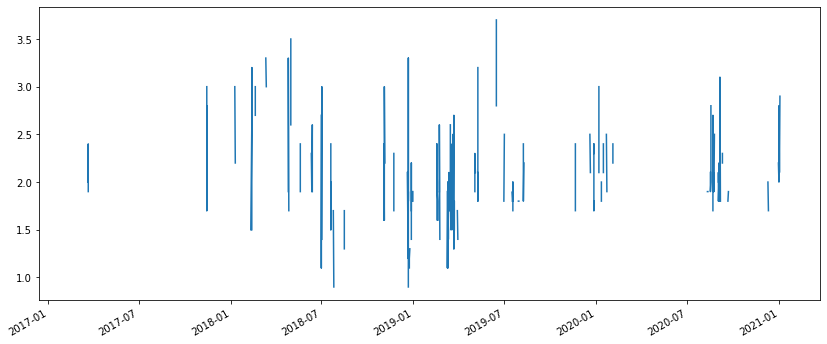

In [14]:
fill_texnet_catalog['Magnitude'].plot(figsize=(14,6))

In [15]:
#I need to fill in the Nan values in the Magnitude column
fill_texnet_catalog['Magnitude'] = fill_texnet_catalog['Magnitude'].fillna(0)
fill_texnet_catalog.head()

,EventID,Evaluation Status,Origin Time,Magnitude,Latitude (WGS84),Longitude (WGS84),LocationName
2017-02-23,texnet2017dtyg,final,14:26:05,2.1,28.9252,-97.9598,Near Coast of Texas
2017-02-24,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2017-02-25,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2017-02-26,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2017-02-27,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [16]:
fill_texnet_catalog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1581 entries, 2017-02-23 to 2021-02-01
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EventID            292 non-null    object 
 1   Evaluation Status  292 non-null    object 
 2   Origin Time        292 non-null    object 
 3   Magnitude          1581 non-null   float64
 4   Latitude (WGS84)   292 non-null    float64
 5   Longitude (WGS84)  292 non-null    float64
 6   LocationName       292 non-null    object 
dtypes: float64(3), object(4)
memory usage: 98.8+ KB


In [17]:
pwd

'/Users/melissamcmillan/Documents/Python_Stuff/GA_DSI_Course/Submissions/projects/capstone-project'

In [18]:
#save this fill_texnet_catalog as a csv file
#fill_texnet_catalog.to_csv('oil_and_gas_data/catalogs/final_texnet_data.csv')

### Dataset 2: USGS's Catalog of Earthquakes for Karnes County, TX

The second dataset I would like to work with is the USGS earthquake catalog for the same area. I need this dataset for historical context to understand what seismicity in Karnes was like prior to when TexNet started its more detailed monitoring in January 2017. TexNet has many more earthquake stations in Karnes, but the USGS have been monitoring on a broader level (less stations) since much earlier than that, so even though the USGS data is less accurate, it will still give me an idea of the frequency of seismicity prior to 2017. I likely won't use the USGS data for my forecast modelling, but it is nice for plotting and showing the rise in seismicity in 2016-2017. This dataset is used primarily for historical context.

In [19]:
#read in the USGS catalog
usgs_quakes = pd.read_csv('oil_and_gas_data/raw_data/usgs_events.csv')
usgs_quakes.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-01-03T17:34:50.406Z,28.8859,-98.1085,5.0,2.8,ml,NaN,75.0,0.127,0.21,...,2021-02-01T14:49:49.159Z,"13 km SW of Falls City, Texas",earthquake,1.3,1.7,0.148,12.0,reviewed,us,us
1,2021-01-01T12:21:50.864Z,28.8387,-98.1177,5.0,2.6,ml,NaN,85.0,0.161,0.54,...,2021-01-26T07:56:06.040Z,southern Texas,earthquake,4.1,2.0,0.097,14.0,reviewed,us,us
2,2020-11-05T16:39:11.461Z,29.0969,-97.8419,5.0,2.6,mb_lg,NaN,66.0,0.121,0.65,...,2021-01-23T22:25:29.040Z,"19 km SE of Stockdale, Texas",earthquake,1.7,1.9,0.128,16.0,reviewed,us,us
3,2020-10-11T15:16:11.434Z,28.5638,-98.1818,5.0,2.5,mb_lg,NaN,112.0,0.372,0.99,...,2020-12-19T17:22:49.040Z,"11 km N of Three Rivers, Texas",earthquake,1.6,1.9,0.114,20.0,reviewed,us,us
4,2020-09-05T08:48:49.559Z,28.9193,-98.1317,5.0,2.8,mb_lg,NaN,69.0,0.135,0.64,...,2020-11-17T19:44:39.040Z,"13 km WSW of Falls City, Texas",earthquake,1.2,1.8,0.064,63.0,reviewed,us,us


In [20]:
usgs_quakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             65 non-null     object 
 1   latitude         65 non-null     float64
 2   longitude        65 non-null     float64
 3   depth            65 non-null     float64
 4   mag              65 non-null     float64
 5   magType          65 non-null     object 
 6   nst              7 non-null      float64
 7   gap              65 non-null     float64
 8   dmin             58 non-null     float64
 9   rms              65 non-null     float64
 10  net              65 non-null     object 
 11  id               65 non-null     object 
 12  updated          65 non-null     object 
 13  place            65 non-null     object 
 14  type             65 non-null     object 
 15  horizontalError  58 non-null     float64
 16  depthError       58 non-null     float64
 17  magError         5

In [21]:
usgs_quakes['date'] = usgs_quakes['time']
usgs_quakes['date'] = pd.to_datetime(usgs_quakes['date']).dt.date

In [22]:
#I need to filter the data back so I don't duplicate recorded events with the texnet catalog; the texnet catalog starts 2-23-2017
#BUT, I do want to retain the entire catalog I've downloaded as a separate csv for plotting purposes.
usgs_all = usgs_quakes.copy()
usgs_timed = usgs_quakes[usgs_quakes['time'] < '2017-2-23']
usgs_timed.drop([50,51,52], axis=0, inplace=True)
usgs_timed.tail()

/Users/melissamcmillan/opt/anaconda3/envs/timer/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,date
60,2011-11-12T10:34:53.850Z,28.869,-98.210,5.0,3.5,mblg,31.0,108.9,NaN,0.78,...,southern Texas,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,2011-11-12
61,2011-10-20T12:24:41.600Z,28.865,-98.079,5.0,4.8,mwr,220.0,30.6,NaN,1.23,...,southern Texas,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,2011-10-20
62,2011-01-10T01:14:22.190Z,29.072,-97.892,5.0,2.6,mblg,12.0,116.5,NaN,1.08,...,southern Texas,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,2011-01-10
63,2010-12-21T13:53:18.040Z,28.642,-98.039,5.0,3.0,mblg,6.0,289.0,NaN,0.88,...,southern Texas,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,2010-12-21
64,2010-03-08T23:47:28.120Z,28.946,-98.039,5.0,3.0,mblg,8.0,141.6,NaN,1.09,...,southern Texas,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,2010-03-08


In [23]:
usgs_timed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 53 to 64
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             12 non-null     object 
 1   latitude         12 non-null     float64
 2   longitude        12 non-null     float64
 3   depth            12 non-null     float64
 4   mag              12 non-null     float64
 5   magType          12 non-null     object 
 6   nst              7 non-null      float64
 7   gap              12 non-null     float64
 8   dmin             5 non-null      float64
 9   rms              12 non-null     float64
 10  net              12 non-null     object 
 11  id               12 non-null     object 
 12  updated          12 non-null     object 
 13  place            12 non-null     object 
 14  type             12 non-null     object 
 15  horizontalError  5 non-null      float64
 16  depthError       5 non-null      float64
 17  magError         

In [24]:
#again, we don't need all this information, so I'm going to pair it down so it matches the columns in the TexNet catalog above
usgs_timed_small = usgs_timed[['time', 'latitude', 'longitude', 'mag', 'id', 'status', 'date']]
usgs_all_small = usgs_all[['time', 'latitude', 'longitude', 'mag', 'id', 'status', 'date']]
usgs_timed_small.head()

,time,latitude,longitude,mag,id,status,date
53,2016-12-13T06:04:59.790Z,28.9917,-97.9172,3.0,us200080ee,reviewed,2016-12-13
54,2015-01-31T03:30:02.570Z,29.0313,-97.9690,2.8,usc000tktb,reviewed,2015-01-31
55,2015-01-31T02:17:02.280Z,28.8457,-98.0800,3.1,usc000tkj3,reviewed,2015-01-31
56,2015-01-30T11:01:38.840Z,29.0610,-97.9756,2.5,usc000tksx,reviewed,2015-01-30
57,2015-01-16T18:07:32.430Z,28.9510,-98.5897,2.8,usc000th0s,reviewed,2015-01-16


In [25]:
usgs_timed_small.set_index('date', inplace=True)
usgs_all_small.set_index('date', inplace=True)

In [26]:
usgs_timed_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2016-12-13 to 2010-03-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       12 non-null     object 
 1   latitude   12 non-null     float64
 2   longitude  12 non-null     float64
 3   mag        12 non-null     float64
 4   id         12 non-null     object 
 5   status     12 non-null     object 
dtypes: float64(3), object(3)
memory usage: 672.0+ bytes


In [27]:
usgs_all_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 2021-01-03 to 2010-03-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       65 non-null     object 
 1   latitude   65 non-null     float64
 2   longitude  65 non-null     float64
 3   mag        65 non-null     float64
 4   id         65 non-null     object 
 5   status     65 non-null     object 
dtypes: float64(3), object(3)
memory usage: 3.6+ KB


In [28]:
#I also want to fill in the days on this dataset too, so I will follow the same workflow as the texnet catalog
#Make an empty dataframe so that I can join on my usgs_quakes df but fill in the other dates
#going to make a second set for the usgs_all_small df
data = [0]
data2 = [0]
index = pd.date_range(start='3/1/2010', end = '2/22/2017', freq = 'D')
index2 = pd.date_range(start = '3/1/2010', end = '1/3/2021', freq = 'D')
data_full = data*len(index)
data_full2 = data2*len(index2)
empty_df = pd.DataFrame(data=data_full, index=index)
empty_df2 = pd.DataFrame(data=data_full2, index=index2 )
empty_df

,0
2010-03-01,0
2010-03-02,0
2010-03-03,0
2010-03-04,0
2010-03-05,0
...,...
2017-02-18,0
2017-02-19,0
2017-02-20,0
2017-02-21,0


In [29]:
#now I'm going to try to do a left join on empty_df with usgs_quakes_small to fill in the dates
fill_usgs_catalog = pd.merge(left=empty_df, 
        right=usgs_timed_small,
        how = 'left',
        left_index=True,
        right_index=True)

In [30]:
#now I'm going to try to do a left join on empty_df with usgs_all_small to fill in the dates
fill_usgs_all_catalog = pd.merge(left=empty_df2, 
        right=usgs_all_small,
        how = 'left',
        left_index=True,
        right_index=True)

In [31]:
fill_usgs_catalog.drop(0, axis=1, inplace=True)
fill_usgs_catalog

,time,latitude,longitude,mag,id,status
2010-03-01,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-02,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-03,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2017-02-18,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-19,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-20,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-21,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
fill_usgs_all_catalog.drop(0, axis=1, inplace=True)
fill_usgs_all_catalog.head(10)

,time,latitude,longitude,mag,id,status
2010-03-01,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-02,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-03,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-05,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-07,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-08,2010-03-08T23:47:28.120Z,28.946,-98.039,3.0,usp000h8zg,reviewed
2010-03-09,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-10,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
fill_usgs_catalog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2552 entries, 2010-03-01 to 2017-02-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       12 non-null     object 
 1   latitude   12 non-null     float64
 2   longitude  12 non-null     float64
 3   mag        12 non-null     float64
 4   id         12 non-null     object 
 5   status     12 non-null     object 
dtypes: float64(3), object(3)
memory usage: 139.6+ KB


In [34]:
fill_usgs_all_catalog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3971 entries, 2010-03-01 to 2021-01-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       65 non-null     object 
 1   latitude   65 non-null     float64
 2   longitude  65 non-null     float64
 3   mag        65 non-null     float64
 4   id         65 non-null     object 
 5   status     65 non-null     object 
dtypes: float64(3), object(3)
memory usage: 217.2+ KB


In [35]:
fill_usgs_catalog['mag'] = fill_usgs_catalog['mag'].fillna(0)
fill_usgs_all_catalog['mag'] = fill_usgs_all_catalog['mag'].fillna(0)

In [36]:
fill_usgs_catalog.tail(10)

,time,latitude,longitude,mag,id,status
2017-02-13,NaN,NaN,NaN,0.0,NaN,NaN
2017-02-14,NaN,NaN,NaN,0.0,NaN,NaN
2017-02-15,NaN,NaN,NaN,0.0,NaN,NaN
2017-02-16,NaN,NaN,NaN,0.0,NaN,NaN
2017-02-17,NaN,NaN,NaN,0.0,NaN,NaN
2017-02-18,NaN,NaN,NaN,0.0,NaN,NaN
2017-02-19,NaN,NaN,NaN,0.0,NaN,NaN
2017-02-20,NaN,NaN,NaN,0.0,NaN,NaN
2017-02-21,NaN,NaN,NaN,0.0,NaN,NaN
2017-02-22,NaN,NaN,NaN,0.0,NaN,NaN


In [37]:
fill_usgs_all_catalog.tail(10)

,time,latitude,longitude,mag,id,status
2020-12-25,NaN,NaN,NaN,0.0,NaN,NaN
2020-12-26,NaN,NaN,NaN,0.0,NaN,NaN
2020-12-27,NaN,NaN,NaN,0.0,NaN,NaN
2020-12-28,NaN,NaN,NaN,0.0,NaN,NaN
2020-12-29,NaN,NaN,NaN,0.0,NaN,NaN
2020-12-30,NaN,NaN,NaN,0.0,NaN,NaN
2020-12-31,NaN,NaN,NaN,0.0,NaN,NaN
2021-01-01,2021-01-01T12:21:50.864Z,28.8387,-98.1177,2.6,us6000d4su,reviewed
2021-01-02,NaN,NaN,NaN,0.0,NaN,NaN
2021-01-03,2021-01-03T17:34:50.406Z,28.8859,-98.1085,2.8,us6000d5ab,reviewed


<AxesSubplot:>

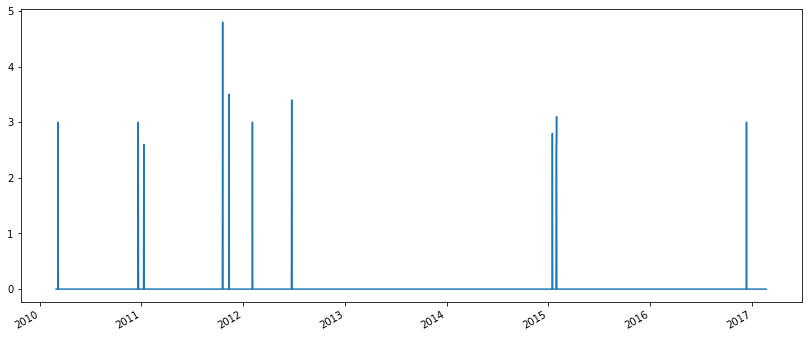

In [38]:
fill_usgs_catalog['mag'].plot(figsize=(14,6))

<AxesSubplot:>

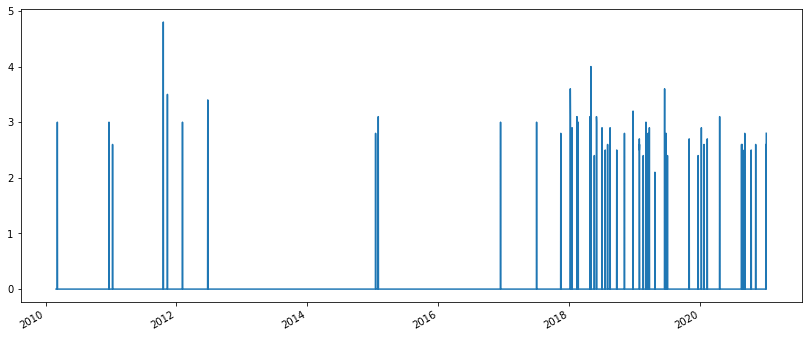

In [39]:
fill_usgs_all_catalog['mag'].plot(figsize=(14,6))

In [40]:
#I'm going to rename the columns to match those of the TexNet catalog
fill_usgs_catalog.rename(columns={'time': 'Origin Time', 'latitude': 'Latitude (WGS84)', 'longitude': 'Longitude (WGS84)', 'mag': 'Magnitude',
                                 'id': 'EventID', 'status': 'Evaluation Status'}, inplace=True)
fill_usgs_catalog.head(3)

,Origin Time,Latitude (WGS84),Longitude (WGS84),Magnitude,EventID,Evaluation Status
2010-03-01,NaN,NaN,NaN,0.0,NaN,NaN
2010-03-02,NaN,NaN,NaN,0.0,NaN,NaN
2010-03-03,NaN,NaN,NaN,0.0,NaN,NaN


In [41]:
#I'm going to rename the columns to match those of the TexNet catalog
fill_usgs_all_catalog.rename(columns={'time': 'Origin Time', 'latitude': 'Latitude (WGS84)', 'longitude': 'Longitude (WGS84)', 'mag': 'Magnitude',
                                 'id': 'EventID', 'status': 'Evaluation Status'}, inplace=True)
fill_usgs_all_catalog.head(3)

,Origin Time,Latitude (WGS84),Longitude (WGS84),Magnitude,EventID,Evaluation Status
2010-03-01,NaN,NaN,NaN,0.0,NaN,NaN
2010-03-02,NaN,NaN,NaN,0.0,NaN,NaN
2010-03-03,NaN,NaN,NaN,0.0,NaN,NaN


In [42]:
#now I'm going to save this dataframe as a csv file
#fill_usgs_catalog.to_csv('oil_and_gas_data/catalogs/final_usgs_catalog.csv')

In [43]:
#now I'm going to save this dataframe as a csv file
#fill_usgs_all_catalog.to_csv('oil_and_gas_data/catalogs/final_usgs_all_events_catalog.csv')

### Combining the texnet and usgs catalogs into one master catalog for historical EDA and modelling

In [44]:
total_catalog = pd.concat([fill_texnet_catalog, fill_usgs_catalog], axis=0)
total_catalog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4133 entries, 2017-02-23 to 2017-02-22
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EventID            304 non-null    object 
 1   Evaluation Status  304 non-null    object 
 2   Origin Time        304 non-null    object 
 3   Magnitude          4133 non-null   float64
 4   Latitude (WGS84)   304 non-null    float64
 5   Longitude (WGS84)  304 non-null    float64
 6   LocationName       292 non-null    object 
dtypes: float64(3), object(4)
memory usage: 258.3+ KB


In [45]:
total_catalog.sort_index(inplace=True)
total_catalog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4133 entries, 2010-03-01 to 2021-02-01
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EventID            304 non-null    object 
 1   Evaluation Status  304 non-null    object 
 2   Origin Time        304 non-null    object 
 3   Magnitude          4133 non-null   float64
 4   Latitude (WGS84)   304 non-null    float64
 5   Longitude (WGS84)  304 non-null    float64
 6   LocationName       292 non-null    object 
dtypes: float64(3), object(4)
memory usage: 258.3+ KB


In [46]:
total_catalog.head(2)

,EventID,Evaluation Status,Origin Time,Magnitude,Latitude (WGS84),Longitude (WGS84),LocationName
2010-03-01,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2010-03-02,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [47]:
total_catalog.tail(2)

,EventID,Evaluation Status,Origin Time,Magnitude,Latitude (WGS84),Longitude (WGS84),LocationName
2021-01-31,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2021-02-01,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [48]:
#I'd like to make columns for Daily Sum of Magnitudes, Daily Counts of Events, and Daily Avg Magnitude
#this is for daily avg magnitude
total_catalog_daily_avg = total_catalog.resample('D').mean()
#this is for weekly avg magnitude
total_catalog_daily_sum = total_catalog.resample('D').sum()
#this is to get the daily count of events
total_catalog_daily_count = total_catalog.resample('D').count()

In [49]:
#these lines will add those calculations to the dataframe
total_catalog['Daily_Sum'] = total_catalog_daily_sum['Magnitude']
total_catalog['Daily_Avg'] = total_catalog_daily_avg['Magnitude']
total_catalog['Daily_Count'] = total_catalog_daily_count['Magnitude']

In [50]:
#then I need to fix the Daily Count column as it calculated the zeros as events
for idx, row in enumerate(total_catalog['Magnitude']):
    if total_catalog['Magnitude'][idx] == 0:
        total_catalog['Daily_Count'][idx] = 0
total_catalog.head(10)

<ipython-input-50-a22918d47f90>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_catalog['Daily_Count'][idx] = 0


,EventID,Evaluation Status,Origin Time,Magnitude,Latitude (WGS84),Longitude (WGS84),LocationName,Daily_Sum,Daily_Avg,Daily_Count
2010-03-01,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0
2010-03-02,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0
2010-03-03,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0
2010-03-04,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0
2010-03-05,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0
2010-03-06,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0
2010-03-07,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0
2010-03-08,usp000h8zg,reviewed,2010-03-08T23:47:28.120Z,3.0,28.946,-98.039,NaN,3.0,3.0,1
2010-03-09,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0
2010-03-10,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0


In [51]:
total_catalog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4133 entries, 2010-03-01 to 2021-02-01
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EventID            304 non-null    object 
 1   Evaluation Status  304 non-null    object 
 2   Origin Time        304 non-null    object 
 3   Magnitude          4133 non-null   float64
 4   Latitude (WGS84)   304 non-null    float64
 5   Longitude (WGS84)  304 non-null    float64
 6   LocationName       292 non-null    object 
 7   Daily_Sum          4133 non-null   float64
 8   Daily_Avg          4133 non-null   float64
 9   Daily_Count        4133 non-null   int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 355.2+ KB


In [52]:
total_catalog.loc['2018-12-15':'2018-12-30']

,EventID,Evaluation Status,Origin Time,Magnitude,Latitude (WGS84),Longitude (WGS84),LocationName,Daily_Sum,Daily_Avg,Daily_Count
2018-12-15,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.000000,0
2018-12-16,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.000000,0
2018-12-17,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.000000,0
2018-12-18,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.000000,0
2018-12-19,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.000000,0
2018-12-20,texnet2018ywij,final,18:04:18,2.1,29.0103,-97.9112,Central Texas,2.1,2.100000,1
2018-12-21,texnet2018yydy,final,18:08:04,1.3,28.9984,-97.9102,Near Coast of Texas,18.0,1.500000,12
2018-12-21,texnet2018yxrz,final,12:03:54,1.5,29.0158,-97.8864,Central Texas,18.0,1.500000,12
2018-12-21,texnet2018yxyy,final,15:35:38,1.2,29.0021,-97.8771,Central Texas,18.0,1.500000,12
2018-12-21,texnet2018yybh,final,16:46:17,1.7,28.9865,-97.9277,Near Coast of Texas,18.0,1.500000,12


In [53]:
#now I want to export this final catalog as a separate csv so I can be ready for modelling
#total_catalog.to_csv('oil_and_gas_data/catalogs/total_seismicity_catalog.csv')

### Dataset 3: Seismicity Catalog from Fasola et al 2019 imported for modelling

In [54]:
fasola = pd.read_csv('oil_and_gas_data/raw_data/fasola_etal_2019_GRL_data_set.csv')

In [55]:
fasola.head(15)

,Time of Earthquake,Epoch Time,Longitude,Latitude,Magnitude,Template Epoch,"Correlated with HF (1=Yes, 0=No)"
0,2014-03-04T06:12:40,1.393914e+09,-98.4551,28.7851,2.02515,1499019121,0
1,2014-03-23T18:26:57,1.395599e+09,-97.7478,29.1000,1.34446,1526837554,0
2,2014-04-24T18:37:50,1.398365e+09,-98.4861,28.7082,1.34899,1528321119,0
3,2014-04-25T04:03:57,1.398399e+09,-98.4861,28.7082,1.31023,1528321119,0
4,2014-06-11T17:59:38,1.402510e+09,-98.0125,28.9188,2.22663,1525192136,1
5,2014-06-11T18:53:09,1.402513e+09,-97.7499,29.0854,1.92928,1526837422,0
6,2014-06-18T04:13:11,1.403065e+09,-98.4923,28.7082,2.01495,1527908747,0
7,2014-06-29T11:48:55,1.404043e+09,-97.9215,28.9902,1.15997,1545460052,0
8,2014-06-30T16:59:06,1.404148e+09,-98.0043,28.9645,1.05147,1524768588,1
9,2014-07-01T18:10:16,1.404238e+09,-98.0043,28.9645,0.989895,1524768588,1


In [56]:
fasola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Time of Earthquake                2823 non-null   object 
 1   Epoch Time                        2823 non-null   float64
 2   Longitude                         2823 non-null   float64
 3   Latitude                          2823 non-null   float64
 4   Magnitude                         2823 non-null   object 
 5   Template Epoch                    2823 non-null   int64  
 6   Correlated with HF (1=Yes, 0=No)  2823 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 154.5+ KB


This catalog is not limited to just Karnes, so I'm going to need to filter it back to just Karnes using the latitude and logitude values. BIG thank you to my classmate, Keith Kruelskie, for pointing me to the Shapely and GeoPandas libraries that would make this work faster. And to this StackOverflow link to help me better understand how to use those libraries: https://stackoverflow.com/questions/51486454/convert-geopandas-shapely-polygon-to-geojson

In [57]:
fasola.shape

(2823, 7)

In [58]:
#make a loop to check if an event is in Karnes
#first make a master_df to add onto:
fasola_karnes = pd.DataFrame()
#outline is broadly the shape of Karnes- I made it square, accepting that a minor amount of rogue events outside Karnes might slip in
outline = shapely.geometry.Polygon([(-97.929185, 28.599466), (-98.1906272, 28.881984), (-97.728699, 29.221230), (-97.441944, 28.906902), (-97.929185, 28.599466)])
for idx, element in enumerate(fasola['Longitude']):
    location = Point(fasola['Longitude'].iloc[idx], fasola['Latitude'].iloc[idx])
    if outline.contains(location):
        interim_df = fasola[fasola.index == idx]
        fasola_karnes = pd.concat([fasola_karnes, interim_df], axis=0, ignore_index=True)
        pass
    else:
        pass

In [59]:
fasola_karnes.shape

(2556, 7)

In [60]:
fasola_karnes.head()

,Time of Earthquake,Epoch Time,Longitude,Latitude,Magnitude,Template Epoch,"Correlated with HF (1=Yes, 0=No)"
0,2014-03-23T18:26:57,1.395599e+09,-97.7478,29.1000,1.34446,1526837554,0
1,2014-06-11T17:59:38,1.402510e+09,-98.0125,28.9188,2.22663,1525192136,1
2,2014-06-11T18:53:09,1.402513e+09,-97.7499,29.0854,1.92928,1526837422,0
3,2014-06-29T11:48:55,1.404043e+09,-97.9215,28.9902,1.15997,1545460052,0
4,2014-06-30T16:59:06,1.404148e+09,-98.0043,28.9645,1.05147,1524768588,1


I've double-checked a few of these coordinates and they are indeed in Karnes County. I can move forward with this catalog now.

In [61]:
fasola_karnes['Date'] = fasola_karnes['Time of Earthquake']
fasola_karnes['Date'] = fasola_karnes['Date'].astype(str)
fasola_karnes['Date'] = pd.to_datetime(fasola_karnes['Date'])
fasola_karnes.set_index('Date', inplace=True)
fasola_karnes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2556 entries, 2014-03-23 18:26:57 to 2018-12-31 21:56:18
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Time of Earthquake                2556 non-null   object 
 1   Epoch Time                        2556 non-null   float64
 2   Longitude                         2556 non-null   float64
 3   Latitude                          2556 non-null   float64
 4   Magnitude                         2556 non-null   object 
 5   Template Epoch                    2556 non-null   int64  
 6   Correlated with HF (1=Yes, 0=No)  2556 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 159.8+ KB


In [62]:
#I'm going to check if I have duplicate dates on 12-22-2018
fasola_date = fasola_karnes.loc['12-22-2018',]
fasola_date['Magnitude'].value_counts()

1.5         6
1.8         3
1.6         2
3.1         2
1.9         2
           ..
1.20405     1
0.888788    1
0.706095    1
0.65395     1
0.743518    1
Name: Magnitude, Length: 95, dtype: int64

In [63]:
fasola_karnes['Magnitude'].value_counts()

X           334
1.5          12
2            10
1.7          10
1.9          10
           ... 
1.2965        1
0.708414      1
0.927511      1
0.824011      1
0.603351      1
Name: Magnitude, Length: 2123, dtype: int64

In [64]:
#I need to drop the rows where Magnitude is X; the supplemental information in the fasola paper states that X is
#given for events where magnitude could not be determined.
#so I'll replacr the X's with Nans here and then drop in the next cell
fasola_karnes['Magnitude'].replace(to_replace='X', value = np.nan, inplace=True)
fasola_karnes['Magnitude'].value_counts()

1.5         12
2           10
1.9         10
1.6         10
1.7         10
            ..
0.974714     1
1.2965       1
0.708414     1
0.927511     1
0.603351     1
Name: Magnitude, Length: 2122, dtype: int64

In [65]:
fasola_karnes.isnull().sum()

Time of Earthquake                    0
Epoch Time                            0
Longitude                             0
Latitude                              0
Magnitude                           334
Template Epoch                        0
Correlated with HF (1=Yes, 0=No)      0
dtype: int64

In [66]:
fasola_karnes.dropna(inplace=True)
fasola_karnes.isnull().sum()

Time of Earthquake                  0
Epoch Time                          0
Longitude                           0
Latitude                            0
Magnitude                           0
Template Epoch                      0
Correlated with HF (1=Yes, 0=No)    0
dtype: int64

In [67]:
fasola_karnes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2222 entries, 2014-03-23 18:26:57 to 2018-12-31 21:56:18
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Time of Earthquake                2222 non-null   object 
 1   Epoch Time                        2222 non-null   float64
 2   Longitude                         2222 non-null   float64
 3   Latitude                          2222 non-null   float64
 4   Magnitude                         2222 non-null   object 
 5   Template Epoch                    2222 non-null   int64  
 6   Correlated with HF (1=Yes, 0=No)  2222 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 138.9+ KB


In [68]:
#I'm going to check if I have duplicate dates on 12-22-2018
#back to the fasola_date df I made previously
fasola_date = fasola_karnes.loc['12-22-2018',]
fasola_date

,Time of Earthquake,Epoch Time,Longitude,Latitude,Magnitude,Template Epoch,"Correlated with HF (1=Yes, 0=No)"
Date,,,,,,,
2018-12-22 00:04:36,2018-12-22T00:04:36,1.545437e+09,-97.9298,29.0140,0.584056,1545457789,1
2018-12-22 00:08:31,2018-12-22T00:08:31,1.545437e+09,-97.9277,28.9865,0.963851,1545410777,1
2018-12-22 00:09:57,2018-12-22T00:09:57,1.545437e+09,-97.9174,29.0067,0.888879,1545456630,1
2018-12-22 00:10:34,2018-12-22T00:10:34,1.545437e+09,-97.9029,29.0103,1.20405,1545425751,1
2018-12-22 00:11:15,2018-12-22T00:11:15,1.545437e+09,-97.9029,29.0085,1.04133,1545423773,1
...,...,...,...,...,...,...,...
2018-12-22 17:11:26,2018-12-22T17:11:26,1.545499e+09,-97.9091,29.0158,0.900518,1545456070,1
2018-12-22 17:46:35,2018-12-22T17:46:35,1.545501e+09,-97.9091,29.0195,0.610508,1545478072,1
2018-12-22 19:17:32,2018-12-22T19:17:32,1.545506e+09,-97.8926,28.9828,0.430467,1545439736,1


In [69]:
#ok there should be no zero magnitude values in my dataset here
fasola_date['Magnitude'].sort_values()

Date
2018-12-22 19:17:32    0.430467
2018-12-22 05:55:43    0.476343
2018-12-22 07:06:33    0.507555
2018-12-22 01:43:05    0.515118
2018-12-22 08:42:24    0.570533
                         ...   
2018-12-22 09:23:09         1.9
2018-12-22 09:26:44         2.3
2018-12-22 02:17:23           3
2018-12-22 07:41:49         3.1
2018-12-22 05:32:45         3.1
Name: Magnitude, Length: 104, dtype: object

So, this dataset will be useful, but if I want to pair it with the rest of my data, I'm going to have to combine it with the rest of my TexNet catalog for events after December 31, 2018. It's going to be piece-meal, I know, but it's the best I've got for now. Ideally, I would want to do template matching on all the data, including the recent data, but I just don't have time for that for my capstone. So, I'm going to use what I have for now and move forward. 

In [70]:
#I need to adjust the columns of the fasola_karnes dataset so I can add the total_catalog data onto it
fasola_karnes['Magnitude'] = fasola_karnes['Magnitude'].astype('float64')
fasola_karnes['EventID'] = 'NaN'
fasola_karnes['LocationName'] = 'Karnes'
fasola_karnes['Evaluation Status'] = 'fasola'
fasola_karnes.rename({'Time of Earthquake': 'Origin Time', 'Longitude':'Longitude (WGS84)', 'Latitude':'Latitude (WGS84)'}, axis=1, inplace=True)
fasola_karnes.drop(['Epoch Time', 'Template Epoch', 'Correlated with HF (1=Yes, 0=No)'], axis=1, inplace=True)
fasola_karnes.head(2)

,Origin Time,Longitude (WGS84),Latitude (WGS84),Magnitude,EventID,LocationName,Evaluation Status
Date,,,,,,,
2014-03-23 18:26:57,2014-03-23T18:26:57,-97.7478,29.1000,1.34446,NaN,Karnes,fasola
2014-06-11 17:59:38,2014-06-11T17:59:38,-98.0125,28.9188,2.22663,NaN,Karnes,fasola


In [71]:
fasola_karnes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2222 entries, 2014-03-23 18:26:57 to 2018-12-31 21:56:18
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Origin Time        2222 non-null   object 
 1   Longitude (WGS84)  2222 non-null   float64
 2   Latitude (WGS84)   2222 non-null   float64
 3   Magnitude          2222 non-null   float64
 4   EventID            2222 non-null   object 
 5   LocationName       2222 non-null   object 
 6   Evaluation Status  2222 non-null   object 
dtypes: float64(3), object(4)
memory usage: 138.9+ KB


In [72]:
fasola_karnes.index = fasola_karnes.index.date
fasola_karnes.head(3)

,Origin Time,Longitude (WGS84),Latitude (WGS84),Magnitude,EventID,LocationName,Evaluation Status
2014-03-23,2014-03-23T18:26:57,-97.7478,29.1000,1.34446,NaN,Karnes,fasola
2014-06-11,2014-06-11T17:59:38,-98.0125,28.9188,2.22663,NaN,Karnes,fasola
2014-06-11,2014-06-11T18:53:09,-97.7499,29.0854,1.92928,NaN,Karnes,fasola


In [73]:
#now I need to make a continuous timeline for this catalog
data = [0]
index = pd.date_range(start='3/23/2014', end = '12/31/2018', freq = 'D')
data_full = data*len(index)
empty_df = pd.DataFrame(data=data_full, index=index)
empty_df.head(10)

,0
2014-03-23,0
2014-03-24,0
2014-03-25,0
2014-03-26,0
2014-03-27,0
2014-03-28,0
2014-03-29,0
2014-03-30,0
2014-03-31,0
2014-04-01,0


In [74]:
fill_fasola_karnes = pd.merge(left=empty_df, right=fasola_karnes, how='left', left_index=True, right_index=True)
fill_fasola_karnes.drop(0, axis=1, inplace=True)
fill_fasola_karnes.head()

,Origin Time,Longitude (WGS84),Latitude (WGS84),Magnitude,EventID,LocationName,Evaluation Status
2014-03-23,2014-03-23T18:26:57,-97.7478,29.1,1.34446,NaN,Karnes,fasola
2014-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
#I need to drop duplicate dates, but this is a careful process, so I will first make a copy
new_fasola_karnes = fill_fasola_karnes.copy()
new_fasola_karnes.head(3)

,Origin Time,Longitude (WGS84),Latitude (WGS84),Magnitude,EventID,LocationName,Evaluation Status
2014-03-23,2014-03-23T18:26:57,-97.7478,29.1,1.34446,NaN,Karnes,fasola
2014-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
new_fasola_karnes.index.value_counts()

2018-12-22    104
2018-12-21     64
2018-07-02     55
2018-02-12     49
2018-05-01     49
             ... 
2014-10-07      1
2016-10-08      1
2016-12-23      1
2015-03-25      1
2015-03-17      1
Length: 1745, dtype: int64

In [77]:
#now I need to fill the Na's in the Magnitude column
new_fasola_karnes['Magnitude'] = new_fasola_karnes['Magnitude'].fillna(0)

In [78]:
new_fasola_karnes.head(3)

,Origin Time,Longitude (WGS84),Latitude (WGS84),Magnitude,EventID,LocationName,Evaluation Status
2014-03-23,2014-03-23T18:26:57,-97.7478,29.1,1.34446,NaN,Karnes,fasola
2014-03-24,NaN,NaN,NaN,0.00000,NaN,NaN,NaN
2014-03-25,NaN,NaN,NaN,0.00000,NaN,NaN,NaN


In [79]:
#now I want to concat only the TexNet events that start on Jan 1, 2019 and go until the end
fill_texnet_catalog_2019 = fill_texnet_catalog.loc['1-1-2019':,]
fill_texnet_catalog_2019.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 835 entries, 2019-01-01 to 2021-02-01
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EventID            168 non-null    object 
 1   Evaluation Status  168 non-null    object 
 2   Origin Time        168 non-null    object 
 3   Magnitude          835 non-null    float64
 4   Latitude (WGS84)   168 non-null    float64
 5   Longitude (WGS84)  168 non-null    float64
 6   LocationName       168 non-null    object 
dtypes: float64(3), object(4)
memory usage: 52.2+ KB


In [80]:
final_fasola_texnet_catalog = pd.concat([new_fasola_karnes, fill_texnet_catalog_2019], axis =0)
final_fasola_texnet_catalog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4395 entries, 2014-03-23 to 2021-02-01
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Origin Time        2390 non-null   object 
 1   Longitude (WGS84)  2390 non-null   float64
 2   Latitude (WGS84)   2390 non-null   float64
 3   Magnitude          4395 non-null   float64
 4   EventID            2390 non-null   object 
 5   LocationName       2390 non-null   object 
 6   Evaluation Status  2390 non-null   object 
dtypes: float64(3), object(4)
memory usage: 274.7+ KB


In [81]:
final_fasola_texnet_catalog.index.value_counts()

2018-12-22    104
2018-12-21     64
2018-07-02     55
2018-02-12     49
2018-05-01     49
             ... 
2019-12-13      1
2016-11-11      1
2017-12-08      1
2020-01-02      1
2019-08-12      1
Length: 2508, dtype: int64

In [82]:
final_fasola_texnet_catalog_date1 = final_fasola_texnet_catalog[final_fasola_texnet_catalog.index == '12-22-2018']
final_fasola_texnet_catalog_date1['Magnitude'].sort_values()

2018-12-22    0.430467
2018-12-22    0.476343
2018-12-22    0.507555
2018-12-22    0.515118
2018-12-22    0.570533
                ...   
2018-12-22    1.900000
2018-12-22    2.300000
2018-12-22    3.000000
2018-12-22    3.100000
2018-12-22    3.100000
Name: Magnitude, Length: 104, dtype: float64

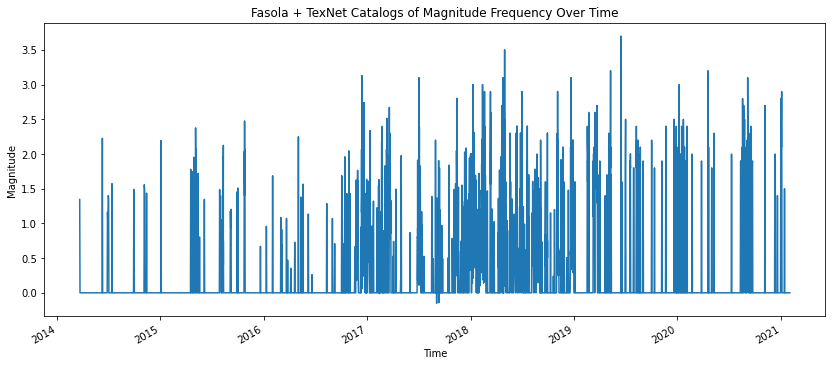

In [83]:
#lets see what this catalog looks like
final_fasola_texnet_catalog['Magnitude'].plot(figsize=(14,6))
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Fasola + TexNet Catalogs of Magnitude Frequency Over Time');

In [84]:
#yup, that's alot more filled in. awesome, I hope this will help with my modelling!

In [85]:
final_fasola_texnet_catalog.resample('D').mean().head(3)

,Longitude (WGS84),Latitude (WGS84),Magnitude
2014-03-23,-97.7478,29.1,1.34446
2014-03-24,NaN,NaN,0.00000
2014-03-25,NaN,NaN,0.00000


In [86]:
final_fasola_texnet_catalog.resample('D').sum().head()

,Longitude (WGS84),Latitude (WGS84),Magnitude
2014-03-23,-97.7478,29.1,1.34446
2014-03-24,0.0000,0.0,0.00000
2014-03-25,0.0000,0.0,0.00000
2014-03-26,0.0000,0.0,0.00000
2014-03-27,0.0000,0.0,0.00000


In [87]:
test = final_fasola_texnet_catalog.resample('D').count()
test_date = test.loc['12-22-2018',]

In [88]:
#so each date is only counted once here
test.index.value_counts()

2016-11-14    1
2020-02-25    1
2019-09-16    1
2018-10-21    1
2016-04-28    1
             ..
2017-01-14    1
2019-08-11    1
2016-03-08    1
2015-01-16    1
2019-08-12    1
Length: 2508, dtype: int64

In [89]:
#now I'd like to make those extra columns
#this is for daily avg magnitude
final_fasola_texnet_daily_avg = final_fasola_texnet_catalog.resample('D').mean()
#this is for weekly avg magnitude
final_fasola_texnet_daily_sum = final_fasola_texnet_catalog.resample('D').sum()
#this is to get the daily count of events
final_fasola_texnet_daily_count = final_fasola_texnet_catalog.resample('D').count()

In [90]:
#these lines will add those calculations to the dataframe
final_fasola_texnet_catalog['Daily_Sum'] = final_fasola_texnet_daily_sum['Magnitude']
final_fasola_texnet_catalog['Daily_Avg'] = final_fasola_texnet_daily_avg['Magnitude']
final_fasola_texnet_catalog['Daily_Count'] = final_fasola_texnet_daily_count['Magnitude']

In [91]:
#going to check now for the 12-22-2018 date
test_new = final_fasola_texnet_catalog.loc['12-22-2018']
test_new

,Origin Time,Longitude (WGS84),Latitude (WGS84),Magnitude,EventID,LocationName,Evaluation Status,Daily_Sum,Daily_Avg,Daily_Count
2018-12-22,2018-12-22T00:04:36,-97.9298,29.0140,0.584056,NaN,Karnes,fasola,109.101739,1.049055,104
2018-12-22,2018-12-22T00:08:31,-97.9277,28.9865,0.963851,NaN,Karnes,fasola,109.101739,1.049055,104
2018-12-22,2018-12-22T00:09:57,-97.9174,29.0067,0.888879,NaN,Karnes,fasola,109.101739,1.049055,104
2018-12-22,2018-12-22T00:10:34,-97.9029,29.0103,1.204050,NaN,Karnes,fasola,109.101739,1.049055,104
2018-12-22,2018-12-22T00:11:15,-97.9029,29.0085,1.041330,NaN,Karnes,fasola,109.101739,1.049055,104
...,...,...,...,...,...,...,...,...,...,...
2018-12-22,2018-12-22T17:11:26,-97.9091,29.0158,0.900518,NaN,Karnes,fasola,109.101739,1.049055,104
2018-12-22,2018-12-22T17:46:35,-97.9091,29.0195,0.610508,NaN,Karnes,fasola,109.101739,1.049055,104
2018-12-22,2018-12-22T19:17:32,-97.8926,28.9828,0.430467,NaN,Karnes,fasola,109.101739,1.049055,104
2018-12-22,2018-12-22T20:53:26,-97.9277,28.9865,0.631147,NaN,Karnes,fasola,109.101739,1.049055,104


In [92]:
#then I need to fix the Daily Count column as it calculated the zeros as events
for idx, row in enumerate(final_fasola_texnet_catalog['Magnitude']):
    if final_fasola_texnet_catalog['Magnitude'][idx] == 0:
        final_fasola_texnet_catalog['Daily_Count'][idx] = 0
final_fasola_texnet_catalog.head(10)

<ipython-input-92-67908ee80b8b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_fasola_texnet_catalog['Daily_Count'][idx] = 0


,Origin Time,Longitude (WGS84),Latitude (WGS84),Magnitude,EventID,LocationName,Evaluation Status,Daily_Sum,Daily_Avg,Daily_Count
2014-03-23,2014-03-23T18:26:57,-97.7478,29.1,1.34446,NaN,Karnes,fasola,1.34446,1.34446,1
2014-03-24,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,0.00000,0.00000,0
2014-03-25,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,0.00000,0.00000,0
2014-03-26,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,0.00000,0.00000,0
2014-03-27,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,0.00000,0.00000,0
2014-03-28,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,0.00000,0.00000,0
2014-03-29,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,0.00000,0.00000,0
2014-03-30,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,0.00000,0.00000,0
2014-03-31,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,0.00000,0.00000,0
2014-04-01,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,0.00000,0.00000,0


In [93]:
final_fasola_texnet_catalog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4395 entries, 2014-03-23 to 2021-02-01
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Origin Time        2390 non-null   object 
 1   Longitude (WGS84)  2390 non-null   float64
 2   Latitude (WGS84)   2390 non-null   float64
 3   Magnitude          4395 non-null   float64
 4   EventID            2390 non-null   object 
 5   LocationName       2390 non-null   object 
 6   Evaluation Status  2390 non-null   object 
 7   Daily_Sum          4395 non-null   float64
 8   Daily_Avg          4395 non-null   float64
 9   Daily_Count        4395 non-null   int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 537.7+ KB


In [94]:
#now I can save this as a csv and move down to the master_dataframe section to make a similar total dataset
#final_fasola_texnet_catalog.to_csv('oil_and_gas_data/catalogs/fasola_texnet_catalog.csv')

In [95]:
final_fasola_texnet_catalog_date = final_fasola_texnet_catalog[final_fasola_texnet_catalog.index == '12-22-2018']
final_fasola_texnet_catalog_date['Daily_Count'].value_counts()

104    104
Name: Daily_Count, dtype: int64

Now I'd like to make one master catalog that combines the USGS dataset onto the Fasola + TexNet datasets.

In [224]:
fill_usgs_all_catalog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3971 entries, 2010-03-01 to 2021-01-03
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Origin Time        65 non-null     object 
 1   Latitude (WGS84)   65 non-null     float64
 2   Longitude (WGS84)  65 non-null     float64
 3   Magnitude          3971 non-null   float64
 4   EventID            65 non-null     object 
 5   Evaluation Status  65 non-null     object 
dtypes: float64(3), object(3)
memory usage: 217.2+ KB


In [226]:
temp_final_fasola_texnet = final_fasola_texnet_catalog.drop(['Daily_Sum', 'LocationName',
                'Daily_Avg', 'Daily_Count'], axis=1)
temp_final_fasola_texnet.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4395 entries, 2014-03-23 to 2021-02-01
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Origin Time        2390 non-null   object 
 1   Longitude (WGS84)  2390 non-null   float64
 2   Latitude (WGS84)   2390 non-null   float64
 3   Magnitude          4395 non-null   float64
 4   EventID            2390 non-null   object 
 5   Evaluation Status  2390 non-null   object 
dtypes: float64(3), object(3)
memory usage: 400.4+ KB


In [227]:
short_usgs = fill_usgs_all_catalog.loc[:'2014-03-22',]
short_usgs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1483 entries, 2010-03-01 to 2014-03-22
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Origin Time        7 non-null      object 
 1   Latitude (WGS84)   7 non-null      float64
 2   Longitude (WGS84)  7 non-null      float64
 3   Magnitude          1483 non-null   float64
 4   EventID            7 non-null      object 
 5   Evaluation Status  7 non-null      object 
dtypes: float64(3), object(3)
memory usage: 81.1+ KB


In [228]:
all_three_catalogs = pd.concat([short_usgs, temp_final_fasola_texnet], axis=0)
all_three_catalogs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5878 entries, 2010-03-01 to 2021-02-01
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Origin Time        2397 non-null   object 
 1   Latitude (WGS84)   2397 non-null   float64
 2   Longitude (WGS84)  2397 non-null   float64
 3   Magnitude          5878 non-null   float64
 4   EventID            2397 non-null   object 
 5   Evaluation Status  2397 non-null   object 
dtypes: float64(3), object(3)
memory usage: 321.5+ KB


In [229]:
#export that catalog to csv
#all_three_catalogs.to_csv('oil_and_gas_data/catalogs/all_three_catalogs.csv')

### Dataset 4: Daily Rig Count for Karnes County, TX as reported by Baker Hughes

The third dataset I will need is the daily or weekly drilling rig count data for Karnes County, as I would like to test correlation between rig count (level of drilling and completion activity) and seismicity for any relationships. Source of data: https://rigcount.bakerhughes.com/na-rig-count#main-menu

In [268]:
#Going to try use openpyxl as Baker Hughes exports the information as an excel file, not a csv
rigs = load_workbook('oil_and_gas_data/raw_data/Rigs by State_012921.xlsx')

In [269]:
len(rigs.sheetnames)

253

In [282]:
sheets = rigs.sheetnames[:134]
sheets[133]

'Dec 09'

In [283]:
len(sheets)

134

In [101]:
sheet_jan21 = rigs['Jan 21']

In [102]:
sheet_jan21['A53'].value

'DISTRICT 2'

In [103]:
sheet_jan21['B53'].value

11

In [104]:
sheet_jan21['B5'].value.date()

datetime.date(2020, 12, 31)

In [105]:
#okay, I think I can use this information. I need to build a dataframe and
#populate it with the data from each each sheet
#the df should look like 1st column: Datetime object, 2nd column: Rig Count
#The week info is always on B5, D5, F5, and H5
#The Rig info for Karnes/District2 is always in B53, D53, F53, and H53

In [106]:
data = {'Week': [sheet_jan21['B5'].value.date()], 'Rigs': [sheet_jan21['B53'].value] }

In [107]:
rigs_df = pd.DataFrame(data=data)
rigs_df

,Week,Rigs
0,2020-12-31,11


Okay, so what if I make a loop to iterate over the sheets and add the weekly info and the rig count information to their respective lists, and then as a last step, turn those lists into a dataframe. 

In [284]:
#list for Weekly Date information:
week_list = []

#list for Rig Count information:
rig_count = []

#counter for potential mismatched cells for district 2
not_karnes = []

In [285]:
#iterate over all the sheets in the excel file:
for element in sheets:
    temp_sheet = rigs[element]
    #print(temp_sheet['A53'].value)
    if temp_sheet['A53'].value == 'DISTRICT 2':
        #print(temp_sheet['A53'])
        #add the rig count information from the required columns
        rig_count.append(temp_sheet['B53'].value)
        rig_count.append(temp_sheet['D53'].value)
        rig_count.append(temp_sheet['F53'].value)
        rig_count.append(temp_sheet['H53'].value)
        rig_count.append(temp_sheet['J53'].value)
        rig_count.append(temp_sheet['L53'].value)
        #add the weekly date information from the required columns
        week_list.append(temp_sheet['B5'].value)
        week_list.append(temp_sheet['D5'].value)
        week_list.append(temp_sheet['F5'].value)
        week_list.append(temp_sheet['H5'].value)
        week_list.append(temp_sheet['J5'].value)
        week_list.append(temp_sheet['L5'].value)
    else:
        not_karnes.append(element)

In [286]:
len(rig_count)

756

In [287]:
len(week_list)

756

In [288]:
rig_count[50]

14

In [289]:
week_list[50]

datetime.datetime(2020, 5, 15, 0, 0)

In [290]:
sheet_jan21['A53'].value == 'DISTRICT 2'

True

In [291]:
len(not_karnes)

8

In [292]:
not_karnes

['Aug 15',
 'Oct 12',
 'May 12',
 'Apr 12',
 'Mar 12',
 'Feb 12',
 'Jan 12',
 'Dec 11']

In [293]:
#time to make the dataframe
rig_count_data = {'Week': week_list, 'Rig Count': rig_count}
rig_count_df = pd.DataFrame(data=rig_count_data)
rig_count_df

,Week,Rig Count
0,2020-12-31 00:00:00,11.0
1,2021-01-08 00:00:00,11.0
2,2021-01-15 00:00:00,11.0
3,2021-01-22 00:00:00,11.0
4,2021-01-29 00:00:00,12.0
...,...,...
751,2009-12-11 00:00:00,12.0
752,2009-12-18 00:00:00,16.0
753,2009-12-23 00:00:00,18.0
754,2009-12-31 00:00:00,18.0


In [294]:
rig_count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Week       675 non-null    object 
 1   Rig Count  675 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.9+ KB


In [295]:
type(rig_count_df['Week'][5])

str

In [296]:
#let me clean so that we only have the date time object rows and not the Avg column rows
#I think I'm going to have to loop over this dataframe to get the string rows out
for i in range(0, len(rig_count_df['Week'])):
    if type(rig_count_df['Week'][i]) == str:
        rig_count_df.drop(i, axis=0, inplace=True)

In [297]:
rig_count_df

,Week,Rig Count
0,2020-12-31 00:00:00,11.0
1,2021-01-08 00:00:00,11.0
2,2021-01-15 00:00:00,11.0
3,2021-01-22 00:00:00,11.0
4,2021-01-29 00:00:00,12.0
...,...,...
750,2009-12-04 00:00:00,13.0
751,2009-12-11 00:00:00,12.0
752,2009-12-18 00:00:00,16.0
753,2009-12-23 00:00:00,18.0


In [298]:
#now I only want the date, not the hour and minutes for the week column
rig_count_df['Week'] = pd.to_datetime(rig_count_df['Week']).dt.date
rig_count_df.head(2)

,Week,Rig Count
0,2020-12-31,11.0
1,2021-01-08,11.0


In [299]:
rig_count_df['Week'] = pd.to_datetime(rig_count_df['Week'])
rig_count_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630 entries, 0 to 754
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Week       549 non-null    datetime64[ns]
 1   Rig Count  549 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.8 KB


In [300]:
rig_count_df.set_index('Week', inplace=True)
rig_count_df.head(2)

,Rig Count
Week,
2020-12-31,11.0
2021-01-08,11.0


In [301]:
rig_count_df.sort_index(inplace=True)

In [302]:
#somehow I have Nan values at the end of my df. I'm going to drop them
rig_count_df.dropna(inplace=True)

In [303]:
rig_count_df.tail(10)

,Rig Count
Week,
2020-11-25,11.0
2020-12-04,11.0
2020-12-11,11.0
2020-12-18,11.0
2020-12-23,11.0
2020-12-31,11.0
2021-01-08,11.0
2021-01-15,11.0
2021-01-22,11.0


In [304]:
rig_count_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 549 entries, 2009-12-04 to 2021-01-29
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rig Count  549 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


In [305]:
#I think I would like this information a daily basis, instead of weekly
#I'm going to use a similar method as the usgs and texnet catalog fillers
data = [0]
index = pd.date_range(start='12/4/2009', end = '1/31/2021', freq = 'D')
data_full = data*len(index)
empty_df = pd.DataFrame(data=data_full, index=index)
empty_df

,0
2009-12-04,0
2009-12-05,0
2009-12-06,0
2009-12-07,0
2009-12-08,0
...,...
2021-01-27,0
2021-01-28,0
2021-01-29,0
2021-01-30,0


In [306]:
#now join
fill_rig_count = pd.merge(left=empty_df, 
        right=rig_count_df,
        how = 'left',
        left_index=True,
        right_index=True)

In [307]:
fill_rig_count.head(20)

,0,Rig Count
2009-12-04,0,13.0
2009-12-05,0,NaN
2009-12-06,0,NaN
2009-12-07,0,NaN
2009-12-08,0,NaN
2009-12-09,0,NaN
2009-12-10,0,NaN
2009-12-11,0,12.0
2009-12-12,0,NaN
2009-12-13,0,NaN


In [312]:
fill_rig_count['Rig Count'].fillna(method='backfill', inplace=True)
fill_rig_count.head(20)

,0,Rig Count
2009-12-04,0,12.0
2009-12-05,0,12.0
2009-12-06,0,12.0
2009-12-07,0,12.0
2009-12-08,0,12.0
2009-12-09,0,12.0
2009-12-10,0,12.0
2009-12-11,0,12.0
2009-12-12,0,16.0
2009-12-13,0,16.0


In [313]:
fill_rig_count.tail(20)

,0,Rig Count
2021-01-12,0,11.0
2021-01-13,0,11.0
2021-01-14,0,11.0
2021-01-15,0,11.0
2021-01-16,0,11.0
2021-01-17,0,11.0
2021-01-18,0,11.0
2021-01-19,0,11.0
2021-01-20,0,11.0
2021-01-21,0,11.0


In [314]:
#it worked! now I just need to fill in the last two rows, which I will use the last weekly take point for (1/29/21)
fill_rig_count.iloc[-2:,1] = 12
fill_rig_count.tail()

,0,Rig Count
2021-01-27,0,12.0
2021-01-28,0,12.0
2021-01-29,0,12.0
2021-01-30,0,12.0
2021-01-31,0,12.0


In [315]:
fill_rig_count.drop(0, axis=1, inplace=True)
fill_rig_count

,Rig Count
2009-12-04,12.0
2009-12-05,12.0
2009-12-06,12.0
2009-12-07,12.0
2009-12-08,12.0
...,...
2021-01-27,12.0
2021-01-28,12.0
2021-01-29,12.0
2021-01-30,12.0


In [316]:
#alright! Now I have a daily rig count dataframe. I'm going to export this as a csv file
#fill_rig_count.to_csv('oil_and_gas_data/reference_data/filled_rig_count.csv')

### Dataset 5: Spot Prices for WTI and Brent Crude from the Energy Information Agency

The fourth dataset I'd like to use is the commodity prices for West Texas Intermediate (WTI) Crude and Brent Crude. This dataset will be used as another gauge for activity level in the Eagle Ford trend, as oil operators tend to reduce drilling and completion activity depending on the price of oil, and some companies rely more on the WTI price than the Brent price (depending on their markets). I want to test if seismicity levels are at all related to level of industry activity, tied to the price of oil (there will likely be some time lag here, which in itself could be interesting to test). The source of this dataset is: https://www.eia.gov/dnav/pet/pet_pri_spt_s1_d.htm. Note that I had to convert this file from the downloaded format (.xls) to a csv for reading in, and while I was saving, I just deleted all the excess tabs except for the Data 1 tab we need. 

In [140]:
comm_prices = pd.read_csv('oil_and_gas_data/raw_data/PET_PRI_SPT_S1_D.csv')
comm_prices.head(3)

,Date,WTI Spot Price,Brent Spot Price,Unnamed: 3
0,"Jan 02, 1986",25.56,NaN,NaN
1,"Jan 03, 1986",26.00,NaN,NaN
2,"Jan 06, 1986",26.53,NaN,NaN


In [141]:
comm_prices.drop('Unnamed: 3', axis=1, inplace=True)

In [142]:
comm_prices.head(2)

,Date,WTI Spot Price,Brent Spot Price
0,"Jan 02, 1986",25.56,NaN
1,"Jan 03, 1986",26.00,NaN


In [143]:
comm_prices['Date'] = pd.to_datetime(comm_prices['Date'])
comm_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8982 entries, 0 to 8981
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              8981 non-null   datetime64[ns]
 1   WTI Spot Price    8846 non-null   float64       
 2   Brent Spot Price  8562 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 210.6 KB


In [144]:
comm_prices.set_index('Date', inplace=True)
comm_prices.head()

,WTI Spot Price,Brent Spot Price
Date,,
1986-01-02,25.56,NaN
1986-01-03,26.00,NaN
1986-01-06,26.53,NaN
1986-01-07,25.85,NaN
1986-01-08,25.87,NaN


In [145]:
comm_prices.sort_index(inplace=True)

For this dataset, I'll only need data for as long as my longest earthquake catalog time period. So, once I figure out that timeframe, I'll use this script to limit the dataset:

In [146]:
comm_prices_small = comm_prices[comm_prices.index > '2011-01-01']
comm_prices_small

,WTI Spot Price,Brent Spot Price
Date,,
2011-01-03,91.59,95.82
2011-01-04,89.39,93.52
2011-01-05,90.30,95.07
2011-01-06,88.37,94.95
2011-01-07,88.07,94.25
...,...,...
2021-02-02,54.77,57.62
2021-02-03,55.67,58.61
2021-02-04,56.19,58.98


In [147]:
#I also need to fill in date gaps in this dataset, preferably with the previous day's values
data = [0]
index = pd.date_range(start='1/1/2011', end = '2/8/2021', freq = 'D')
data_full = data*len(index)
empty_df = pd.DataFrame(data=data_full, index=index)
empty_df

,0
2011-01-01,0
2011-01-02,0
2011-01-03,0
2011-01-04,0
2011-01-05,0
...,...
2021-02-04,0
2021-02-05,0
2021-02-06,0
2021-02-07,0


In [148]:
#now join
fill_comm_price = pd.merge(left=empty_df, 
        right=comm_prices_small,
        how = 'left',
        left_index=True,
        right_index=True)

In [149]:
fill_comm_price.tail(20)

,0,WTI Spot Price,Brent Spot Price
2021-01-20,0,53.16,55.66
2021-01-21,0,53.00,55.68
2021-01-22,0,52.28,55.22
2021-01-23,0,NaN,NaN
2021-01-24,0,NaN,NaN
2021-01-25,0,52.78,55.44
2021-01-26,0,52.61,55.26
2021-01-27,0,52.81,55.07
2021-01-28,0,52.26,54.87
2021-01-29,0,52.16,55.25


In [150]:
#now I need to fill in the Nan's, and I'd like to fill them with the previous day's values
fill_comm_price['WTI Spot Price'] = fill_comm_price['WTI Spot Price'].fillna(method='pad')
fill_comm_price['WTI Spot Price'] = fill_comm_price['WTI Spot Price'].fillna(method='bfill')

In [151]:
fill_comm_price['Brent Spot Price'] = fill_comm_price['Brent Spot Price'].fillna(method='pad')
fill_comm_price['Brent Spot Price'] = fill_comm_price['Brent Spot Price'].fillna(method='bfill')

In [152]:
fill_comm_price.drop(0, axis=1, inplace=True)
fill_comm_price.head(20)

,WTI Spot Price,Brent Spot Price
2011-01-01,91.59,95.82
2011-01-02,91.59,95.82
2011-01-03,91.59,95.82
2011-01-04,89.39,93.52
2011-01-05,90.30,95.07
2011-01-06,88.37,94.95
2011-01-07,88.07,94.25
2011-01-08,88.07,94.25
2011-01-09,88.07,94.25
2011-01-10,89.24,95.05


<AxesSubplot:>

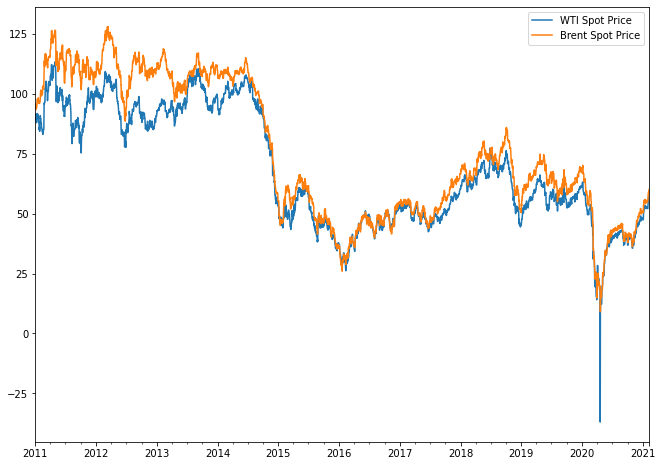

In [153]:
fill_comm_price.plot(figsize=(11,8))

In [154]:
#now going to save this dataset as a csv file
#fill_comm_price.to_csv('oil_and_gas_data/reference_data/filled_commodity_price.csv')

### Dataset 6: Completion/Frac Information for all wells in Karnes County, TX from FracFocus Database

The next dataset I'd like to read in is the completion information for operators in Karnes County. I am interested in testing for any relationships between seismicity frequency or magnitude and various well completion parameters like frac volume, amount of proppant used, operators completing simultaneously, etc. The data is coming from FracFocus, a public database that contains details about each operator's completion. The Texas Railroad Commission (regulator) requires that all operators report to this database, so it's the most comprehensive look at all the completions I can get for free. The information provided by FracFocus comes in BIG files, so I'll need to be smart about how I handle them. The source for the data is here: https://fracfocus.org/data-download.

After much iterating, I ended up coding a process to read in the original csv's that were downloaded from the FracFocus website (linked just above), and filtering just on the Karnes County Number (255). Once each file is filtered, it is saved from its root folder into the directory used for this project (this original csv files from the website were much too big to put in our working directory and saved on Github, so I needed to use this process to make them smaller). The code for that process is here in the next cell, unhash it to use. Note you will need to hard code in the directory where you stored that original FracFocus data and where you want to save the final csv's (the working directory for this project).

In [155]:
#Loop through the files in the directory where original FracFocus csv files are kept.
#I can use the os library to do this
#first grab the files from the directory and put the ones we need into a list
# files = os.listdir('/Users/melissamcmillan/Documents/Python_Stuff/GA_DSI_Course/FracFocusCSV')
# frac_files = []
# for element in files:
#     if 'Frac' in element:
#         frac_files.append(element)
# #frac_files

# #now loop through the files, get the data we need, and save to a csv in our oil_and_gas_data folder for the project
# for element in frac_files:
#     element_df = pd.read_csv(element)
#     element_df_karnes_only = element_df[element_df['CountyNumber'] == 255]
#     element_df_karnes_only.to_csv(f'/Users/melissamcmillan/Documents/Python_Stuff/GA_DSI_Course/Submissions/projects/capstone-project/oil_and_gas_Data/frac_focus/karnes_{element}')

Now that we have individual FracFocus files for Karnes County only, we need to get to the actual data we want: the well and operator information, the total water used in each frac, and the water and sand used in each frac. After much experimentation, I came up with this workflow to loop through each csv file, grab the data we want, and add it to a master dataframe that we can then export to a final csv. See below.

In [232]:
master_karnes_fracinfo = pd.DataFrame()

In [233]:
#This is the process I generated for going through each csv in the folder, grabbing the data we need, and making a master dataframe

#first, access the directory to get the files we need:
filepath = 'oil_and_gas_data/frac_focus/'
frac_files = os.listdir(filepath)
karnes_frac_files = []
for element in frac_files:
    if 'Frac' in element:
        karnes_frac_files.append(element)
#karnes_frac_files

#now grab the data we need from each file
for element in karnes_frac_files:
    #step 1: read in dataset, print out the counter, the number of unique operators and well names in the csv
    element_df = pd.read_csv(filepath + element, index_col=0)
    print(f'You are on Step 1, csv: {element}.')
    print(f'The number of unique operators in the root dataset is {len(element_df["OperatorName"].unique())}.')
    print(f'The number of unique well names in the root dataset is {len(element_df["WellName"].unique())}.')
    
    #step 2: make a smaller df w/ only the columns we need, again print out the number of unique operators and well names to make sure we aren't losing valuable data
    element_df_small = element_df[['JobStartDate', 'JobEndDate', 'APINumber', 'OperatorName', 'WellName', 'TotalBaseWaterVolume', 'Purpose', 'IngredientName', 'PercentHFJob']]
    print(f'You are on Step 2, csv: {element}.')
    print(f'The number of unique operators in the small dataset is {len(element_df_small["OperatorName"].unique())}.')
    print(f'The number of unique well names in the small dataset is {len(element_df_small["WellName"].unique())}.')
    print(" ")

    #step 3: make a water_df that contains only the data with water for the IngredientName
    element_df_water = element_df_small[element_df_small['IngredientName'].str.contains("ater", na=False)]
    print(f'You are on Step 3, csv: {element}.')
    print(f'The number of unique operators in the water dataset is {len(element_df_water["OperatorName"].unique())}.')
    print(f'The number of unique well names in the water dataset is {len(element_df_water["WellName"].unique())}.')
    
    #step 4: filter water down by using the PercentHF Job value. Usually the value is >60 when water is the base
    element_df_water_base = element_df_water[element_df_water['PercentHFJob'] > 60]
    print(f'You are on Step 4, csv: {element}.')
    print(f'The number of unique operators in the base water dataset is {len(element_df_water_base["OperatorName"].unique())}.')
    print(f'The number of unique well names in the base water dataset is {len(element_df_water_base["WellName"].unique())}.')
    
    #step 5: calculate data loss in filtering down to water base
    water_list = element_df_water['WellName'].unique()
    water_base_list = element_df_water_base['WellName'].unique()
    print(f'You have lost {(1-(len(water_base_list)/len(water_list)))*100}% of {len(water_list)} wells in filtering water by PercentHFJob')
    print(" ")
    
    #step 6: make a sand_df that contains only the data with silica for the IngredientName
    element_df_sand = element_df_small[element_df_small['IngredientName'].str.contains("ilica", na=False)]
    print(f'You are on Step 5, csv: {element}.')
    print(f'The number of unique operators in the sand dataset is {len(element_df_sand["OperatorName"].unique())}.')
    print(f'The number of unique well names in the sand dataset is {len(element_df_sand["WellName"].unique())}.')
    
    #step 7: make a sand_propp_df that only keeps the rows where sand PercentHF Job > 2
    element_df_sand_propp = element_df_sand[element_df_sand['PercentHFJob'] > 2]
    print(f'You are on Step 6, csv: {element}.')
    print(f'The number of unique operators in the sand propp dataset is {len(element_df_sand_propp["OperatorName"].unique())}.')
    print(f'The number of unique well names in the sand propp dataset is {len(element_df_sand_propp["WellName"].unique())}.')
    
    #step 8: calculate data loss in filtering down to water base
    sand_list = element_df_sand['WellName'].unique()
    sand_propp_list = element_df_sand_propp['WellName'].unique()
    print(f'You have lost {(1-(len(sand_propp_list)/len(sand_list)))*100}% of {len(sand_list)} wells in filtering sand by PercentHFJob')
    print(" ")
    
    #step 9: concatenate the water_base and sand_proppant df's to the master df and print out the unique operators and well names; some loss is okay, but not a significant amount
    #check the shape of master_karnes_fracinfo before concatenation begins
    print(f'You are on Step 7, csv:{element}.')
    print(f'The shape of master_karnes_fracinfo before concat is {master_karnes_fracinfo.shape}.')
    master_karnes_fracinfo = pd.concat([master_karnes_fracinfo, element_df_water_base], axis=0, ignore_index=True)
    print(f'The shape of master_df after adding water_base_df is {master_karnes_fracinfo.shape}.')
    master_karnes_fracinfo = pd.concat([master_karnes_fracinfo, element_df_sand_propp], axis=0, ignore_index=True)
    print(f'The shape of master_df after adding sand_propp_df is {master_karnes_fracinfo.shape}.')
    print(" ")

You are on Step 1, csv: karnes_FracFocusRegistry_20.csv.
The number of unique operators in the root dataset is 16.
The number of unique well names in the root dataset is 282.
You are on Step 2, csv: karnes_FracFocusRegistry_20.csv.
The number of unique operators in the small dataset is 16.
The number of unique well names in the small dataset is 282.
 
You are on Step 3, csv: karnes_FracFocusRegistry_20.csv.
The number of unique operators in the water dataset is 16.
The number of unique well names in the water dataset is 282.
You are on Step 4, csv: karnes_FracFocusRegistry_20.csv.
The number of unique operators in the base water dataset is 16.
The number of unique well names in the base water dataset is 268.
You have lost 4.964539007092195% of 282 wells in filtering water by PercentHFJob
 
You are on Step 5, csv: karnes_FracFocusRegistry_20.csv.
The number of unique operators in the sand dataset is 16.
The number of unique well names in the sand dataset is 263.
You are on Step 6, csv: 

Note how I monitored how many wells I was losing after each step, sometimes as much as 10-11%. I went into these files specifically and looked at the wells being left behind, and I found that they are wells that had inconsistent reporting relative to the majority, and the information left out was info I couldn't really use anyway. I'm wanting to examine the % water used as a base and % sand used for frac proppant, and the wells being left out did not report that information in a consistent way. So, I feel comfortable leaving those wells and data behind. It's a fairly minimal amount relative to the overall dataset anyway.

In [234]:
#do a quick inspection of the data
master_karnes_fracinfo.tail()

,JobStartDate,JobEndDate,APINumber,OperatorName,WellName,TotalBaseWaterVolume,Purpose,IngredientName,PercentHFJob
7069,11/8/2016 12:00:00 AM,11/12/2016 12:00:00 AM,42255350270100,"EOG Resources, Inc.",PRESLEY UNIT # 5H,9135588.0,NaN,Crystalline Silica,13.876730
7070,11/12/2016 1:03:47 AM,11/12/2016 3:47:02 AM,42255348610000,Marathon Oil,Zaeske Eckols 3H,6977250.0,NaN,"Crystalline silica, quartz",15.800419
7071,10/28/2016 5:00:00 AM,11/12/2016 6:00:00 AM,42255347920000,BHP Billiton Petroleum,Gallo Rojo 2H,11163657.0,NaN,"Quartz, Crystalline silica",2.602930
7072,10/24/2016 5:00:00 AM,11/13/2016 6:00:00 AM,42255347960000,BHP Billiton Petroleum,Gallo Rojo A Tillie Ann SA 1H,16198780.0,NaN,"Quartz, Crystalline silica",5.734120
7073,11/9/2016 12:00:00 AM,11/14/2016 12:00:00 AM,42255346330000,"EOG Resources, Inc.",MANCHACA UNIT # 5H,10107006.0,NaN,Crystalline Silica,10.770040


In [235]:
master_karnes_fracinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7074 entries, 0 to 7073
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   JobStartDate          7072 non-null   object 
 1   JobEndDate            7074 non-null   object 
 2   APINumber             7074 non-null   int64  
 3   OperatorName          7074 non-null   object 
 4   WellName              7074 non-null   object 
 5   TotalBaseWaterVolume  7074 non-null   float64
 6   Purpose               5312 non-null   object 
 7   IngredientName        7074 non-null   object 
 8   PercentHFJob          7074 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 497.5+ KB


In [236]:
#now that I have a consolidated dataset, I need to calculate frac duration and see about making the job start date a datetime column
frac_data = master_karnes_fracinfo.copy()
frac_data['JobStartDate'] = pd.to_datetime(frac_data['JobStartDate']).dt.date
frac_data['JobEndDate'] = pd.to_datetime(frac_data['JobEndDate']).dt.date
frac_data['Job_Duration'] = frac_data['JobEndDate'] - frac_data['JobStartDate']
frac_data.head()

,JobStartDate,JobEndDate,APINumber,OperatorName,WellName,TotalBaseWaterVolume,Purpose,IngredientName,PercentHFJob,Job_Duration
0,2019-09-29,2019-10-20,42255364910000,Marathon Oil,Yosko Kinkler Witte PSA 1H,9768332.0,Carrier/Base Fluid,Water,86.458353,21 days
1,2019-09-30,2019-10-21,42255364820000,Marathon Oil,Y.Witte-K.Laubach PSA 1H,9870353.0,Carrier/Base Fluid,Water,85.526622,21 days
2,2019-09-29,2019-10-21,42255364950000,Marathon Oil,Salge Kinkler Busselman PSA 1H,11362850.0,Carrier/Base Fluid,Water,85.744681,22 days
3,2019-09-29,2019-10-23,42255364800000,Marathon Oil,Salge Busselman 6H,9873400.0,Carrier/Base Fluid,Water,85.386893,24 days
4,2019-09-29,2019-10-23,42255364810000,Marathon Oil,Salge Busselman 7H,10198400.0,Carrier/Base Fluid,Water,85.842162,24 days


In [237]:
frac_data['StartDate'] = frac_data['JobStartDate']
frac_data.set_index('StartDate', inplace=True)
frac_data.head()

,JobStartDate,JobEndDate,APINumber,OperatorName,WellName,TotalBaseWaterVolume,Purpose,IngredientName,PercentHFJob,Job_Duration
StartDate,,,,,,,,,,
2019-09-29,2019-09-29,2019-10-20,42255364910000,Marathon Oil,Yosko Kinkler Witte PSA 1H,9768332.0,Carrier/Base Fluid,Water,86.458353,21 days
2019-09-30,2019-09-30,2019-10-21,42255364820000,Marathon Oil,Y.Witte-K.Laubach PSA 1H,9870353.0,Carrier/Base Fluid,Water,85.526622,21 days
2019-09-29,2019-09-29,2019-10-21,42255364950000,Marathon Oil,Salge Kinkler Busselman PSA 1H,11362850.0,Carrier/Base Fluid,Water,85.744681,22 days
2019-09-29,2019-09-29,2019-10-23,42255364800000,Marathon Oil,Salge Busselman 6H,9873400.0,Carrier/Base Fluid,Water,85.386893,24 days
2019-09-29,2019-09-29,2019-10-23,42255364810000,Marathon Oil,Salge Busselman 7H,10198400.0,Carrier/Base Fluid,Water,85.842162,24 days


In [238]:
frac_data.index = pd.to_datetime(frac_data.index)
frac_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7074 entries, 2019-09-29 to 2016-11-09
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   JobStartDate          7072 non-null   object         
 1   JobEndDate            7074 non-null   object         
 2   APINumber             7074 non-null   int64          
 3   OperatorName          7074 non-null   object         
 4   WellName              7074 non-null   object         
 5   TotalBaseWaterVolume  7074 non-null   float64        
 6   Purpose               5312 non-null   object         
 7   IngredientName        7074 non-null   object         
 8   PercentHFJob          7074 non-null   float64        
 9   Job_Duration          7072 non-null   timedelta64[ns]
dtypes: float64(2), int64(1), object(6), timedelta64[ns](1)
memory usage: 607.9+ KB


In [239]:
frac_data.tail()

,JobStartDate,JobEndDate,APINumber,OperatorName,WellName,TotalBaseWaterVolume,Purpose,IngredientName,PercentHFJob,Job_Duration
StartDate,,,,,,,,,,
2016-11-08,2016-11-08,2016-11-12,42255350270100,"EOG Resources, Inc.",PRESLEY UNIT # 5H,9135588.0,NaN,Crystalline Silica,13.876730,4 days
2016-11-12,2016-11-12,2016-11-12,42255348610000,Marathon Oil,Zaeske Eckols 3H,6977250.0,NaN,"Crystalline silica, quartz",15.800419,0 days
2016-10-28,2016-10-28,2016-11-12,42255347920000,BHP Billiton Petroleum,Gallo Rojo 2H,11163657.0,NaN,"Quartz, Crystalline silica",2.602930,15 days
2016-10-24,2016-10-24,2016-11-13,42255347960000,BHP Billiton Petroleum,Gallo Rojo A Tillie Ann SA 1H,16198780.0,NaN,"Quartz, Crystalline silica",5.734120,20 days
2016-11-09,2016-11-09,2016-11-14,42255346330000,"EOG Resources, Inc.",MANCHACA UNIT # 5H,10107006.0,NaN,Crystalline Silica,10.770040,5 days


In [240]:
frac_data.sort_index(inplace=True)
frac_data.head()

,JobStartDate,JobEndDate,APINumber,OperatorName,WellName,TotalBaseWaterVolume,Purpose,IngredientName,PercentHFJob,Job_Duration
StartDate,,,,,,,,,,
2011-11-20,2011-11-20,2011-11-22,42255320740000,Pioneer Natural Resources,Sippel 01 01H,2886828.0,Carrier / Base Fluid,Water,87.039837,2 days
2012-03-02,2012-03-02,2012-03-06,42255328870000,BHP Billiton Petroleum,Gallo Rojo A 5H,3179106.0,Carrier/Base Fluid,Water,81.272541,4 days
2012-03-02,2012-03-02,2012-03-06,42255328870000,BHP Billiton Petroleum,Gallo Rojo A 5H,3179106.0,Proppant,Silica Substrate,16.978074,4 days
2012-03-24,2012-03-24,2012-03-26,42255322990000,Pioneer Natural Resources,Watson 01 01H,1974168.0,Carrier / Base Fluid,Water,87.375300,2 days
2012-03-24,2012-03-24,2012-03-26,42255322990000,Pioneer Natural Resources,Watson 01 01H,1974168.0,Proppant,Crystalline Silica in the form of Quartz,11.512732,2 days


In [241]:
#I think we can drop the entries with Job Duration = 0 days; those aren't real fracs, maybe just preload jobs or something
frac_data = frac_data[frac_data['Job_Duration'] != '0 days']

In [242]:
#I would like to consolidate this data further by separating out the sand information out and adding it to the main df
#This got fairly involved, so I need to write out the steps
#step 1: separate out the water data from the sand data
water_df = frac_data[frac_data['IngredientName'].str.contains("ater", na=False)]
sand_df = frac_data[frac_data['IngredientName'].str.contains("ilica", na=False)]

#drop the duplicates on both, and note this only applies to rows where all the column values are equal, so this is pretty sfe to do
water_df = water_df.drop_duplicates()
sand_df = sand_df.drop_duplicates()

In [243]:
#now I need to add the sand values for the wells with multiple entries
sand_concat_df = pd.DataFrame()

In [244]:
#this will loop through and calculate the sums of the sand values for wells that have multiple proppant calculations
temp_list = sand_df['WellName']
for element in temp_list:
    element_df = sand_df[sand_df['WellName'] == element]
    element_df['Sum_Sand_PctHFJob'] = element_df['PercentHFJob'].sum()    
    sand_concat_df = pd.concat([sand_concat_df, element_df], axis=0, ignore_index=True)

<ipython-input-244-84af7860cf0e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  element_df['Sum_Sand_PctHFJob'] = element_df['PercentHFJob'].sum()


In [245]:
#now merge into main sand_df dataframe
sand_concat_small = sand_concat_df[['WellName', 'Sum_Sand_PctHFJob']]
sand_df = pd.merge(left = sand_df, right=sand_concat_small, on='WellName')

In [246]:
#now I need to remove the well names that are in the sand_df but not in the water_df
#i've cross-referenced those well names in the frac focus website and they are poor data entries and of no use to me
#they are a minimal amount of the data anyway
#this makes a list of names that are in the sand_df but not in the water_df; this will be the list of names to get rid of
water_names = [element for element in water_df['WellName']]
other_names = []
for name in sand_df['WellName']:
    if name not in water_names:
        other_names.append(name)
len(other_names)

121

In [247]:
#now get those names out of sand_df
for element in other_names:
    sand_df = sand_df[sand_df['WellName'] != element]

In [248]:
#run the script again to make sure it worked; we expect other_names2 to be empty
water_names2 = [element for element in water_df['WellName']]
other_names2 = []
for name in sand_df['WellName']:
    if name not in water_names2:
        other_names2.append(name)
len(other_names2)

0

In [249]:
#rename the columns and make a smaller df in prep for merging with water_df
sand_df.rename({'Purpose': 'Sand_Purpose', 'IngredientName': 'Sand_IngredientName'}, axis=1, inplace=True)
sand_df_small = sand_df[['WellName', 'Sand_Purpose', 'Sand_IngredientName', 'Sum_Sand_PctHFJob']]
#merge with water_df
new_frac_df = pd.merge(left = water_df, right=sand_df_small, on = 'WellName')
#in all of those steps I lost my date time index, so I need to add it back in
new_frac_df['StartDate'] = new_frac_df['JobStartDate']
new_frac_df.set_index('StartDate', inplace=True)
new_frac_df.index = pd.to_datetime(new_frac_df.index)
new_frac_df.sort_index(inplace=True)

In [250]:
#take a look at our new dataframe! This is a cleaned dataset with total water, %water, and %proppant used for every frac
new_frac_df

,JobStartDate,JobEndDate,APINumber,OperatorName,WellName,TotalBaseWaterVolume,Purpose,IngredientName,PercentHFJob,Job_Duration,Sand_Purpose,Sand_IngredientName,Sum_Sand_PctHFJob
StartDate,,,,,,,,,,,,,
2012-03-02,2012-03-02,2012-03-06,42255328870000,BHP Billiton Petroleum,Gallo Rojo A 5H,3179106.0,Carrier/Base Fluid,Water,81.272541,4 days,Proppant,Silica Substrate,33.956147
2012-03-02,2012-03-02,2012-03-06,42255328870000,BHP Billiton Petroleum,Gallo Rojo A 5H,3179106.0,Carrier/Base Fluid,Water,81.272541,4 days,Proppant,Silica Substrate,33.956147
2012-03-02,2012-03-02,2012-03-06,42255328870000,BHP Billiton Petroleum,Gallo Rojo A 5H,3179106.0,Carrier/Base Fluid,Water,81.272541,4 days,Proppant,Silica Substrate,33.956147
2012-03-02,2012-03-02,2012-03-06,42255328870000,BHP Billiton Petroleum,Gallo Rojo A 5H,3179106.0,Carrier/Base Fluid,Water,81.272541,4 days,Proppant,Silica Substrate,33.956147
2012-03-02,2012-03-02,2012-03-06,42255328870000,BHP Billiton Petroleum,Gallo Rojo A 5H,3179106.0,Carrier/Base Fluid,Water,81.272541,4 days,Proppant,Silica Substrate,33.956147
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-04,2020-12-04,2020-12-15,42255369580000,"EOG Resources, Inc.",HORSE THIEF UNIT # 8H,14461524.0,Carrier/Base Fluid,Water,83.622440,11 days,NaN,Crystalline Silica,16.296540
2020-12-04,2020-12-04,2020-12-15,42255369550000,"EOG Resources, Inc.",GAMERA C # 3H,14275674.0,Carrier/Base Fluid,Water,83.457900,11 days,NaN,Crystalline Silica,16.458910
2020-12-05,2020-12-05,2020-12-15,42255369600000,"EOG Resources, Inc.",HORSE THIEF UNIT # 9H,14437164.0,Carrier/Base Fluid,Water,83.658490,10 days,NaN,Crystalline Silica,16.258500


In [251]:
#hmm I see the last entry has an NaT in the Job Start Date column. I'm going to drop that one
#new_frac_df['JobStartDate'].isna().sum()
new_frac_df = new_frac_df.drop(new_frac_df.tail(1).index)
new_frac_df.tail(3)

,JobStartDate,JobEndDate,APINumber,OperatorName,WellName,TotalBaseWaterVolume,Purpose,IngredientName,PercentHFJob,Job_Duration,Sand_Purpose,Sand_IngredientName,Sum_Sand_PctHFJob
StartDate,,,,,,,,,,,,,
2020-12-04,2020-12-04,2020-12-15,42255369550000,"EOG Resources, Inc.",GAMERA C # 3H,14275674.0,Carrier/Base Fluid,Water,83.45790,11 days,NaN,Crystalline Silica,16.45891
2020-12-05,2020-12-05,2020-12-15,42255369600000,"EOG Resources, Inc.",HORSE THIEF UNIT # 9H,14437164.0,Carrier/Base Fluid,Water,83.65849,10 days,NaN,Crystalline Silica,16.25850
2020-12-05,2020-12-05,2020-12-15,42255369560000,"EOG Resources, Inc.",HORSE THIEF UNIT # 7H,14271726.0,Carrier/Base Fluid,Water,83.41214,10 days,NaN,Crystalline Silica,16.50368


In [252]:
new_frac_df['Job_Duration'] = new_frac_df['Job_Duration'].dt.days

<ipython-input-252-8f0ce7c33aa4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_frac_df['Job_Duration'] = new_frac_df['Job_Duration'].dt.days


In [253]:
#I would also like to make a column that is Total Volume of Water/Day so I can see how much water is being injected per day
new_frac_df['VolumeH2O_per_Day'] = new_frac_df['TotalBaseWaterVolume'] / new_frac_df['Job_Duration']
new_frac_df['Water_per_Ft'] = new_frac_df['TotalBaseWaterVolume'] / 5280

<ipython-input-253-0e2f9692964e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_frac_df['VolumeH2O_per_Day'] = new_frac_df['TotalBaseWaterVolume'] / new_frac_df['Job_Duration']
<ipython-input-253-0e2f9692964e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_frac_df['Water_per_Ft'] = new_frac_df['TotalBaseWaterVolume'] / 5280


In [254]:
new_frac_df.head()

,JobStartDate,JobEndDate,APINumber,OperatorName,WellName,TotalBaseWaterVolume,Purpose,IngredientName,PercentHFJob,Job_Duration,Sand_Purpose,Sand_IngredientName,Sum_Sand_PctHFJob,VolumeH2O_per_Day,Water_per_Ft
StartDate,,,,,,,,,,,,,,,
2012-03-02,2012-03-02,2012-03-06,42255328870000,BHP Billiton Petroleum,Gallo Rojo A 5H,3179106.0,Carrier/Base Fluid,Water,81.272541,4,Proppant,Silica Substrate,33.956147,794776.5,602.103409
2012-03-02,2012-03-02,2012-03-06,42255328870000,BHP Billiton Petroleum,Gallo Rojo A 5H,3179106.0,Carrier/Base Fluid,Water,81.272541,4,Proppant,Silica Substrate,33.956147,794776.5,602.103409
2012-03-02,2012-03-02,2012-03-06,42255328870000,BHP Billiton Petroleum,Gallo Rojo A 5H,3179106.0,Carrier/Base Fluid,Water,81.272541,4,Proppant,Silica Substrate,33.956147,794776.5,602.103409
2012-03-02,2012-03-02,2012-03-06,42255328870000,BHP Billiton Petroleum,Gallo Rojo A 5H,3179106.0,Carrier/Base Fluid,Water,81.272541,4,Proppant,Silica Substrate,33.956147,794776.5,602.103409
2012-03-02,2012-03-02,2012-03-06,42255328870000,BHP Billiton Petroleum,Gallo Rojo A 5H,3179106.0,Carrier/Base Fluid,Water,81.272541,4,Proppant,Silica Substrate,33.956147,794776.5,602.103409


In [255]:
new_frac_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5634 entries, 2012-03-02 to 2020-12-05
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   JobStartDate          5634 non-null   object 
 1   JobEndDate            5634 non-null   object 
 2   APINumber             5634 non-null   int64  
 3   OperatorName          5634 non-null   object 
 4   WellName              5634 non-null   object 
 5   TotalBaseWaterVolume  5634 non-null   float64
 6   Purpose               5321 non-null   object 
 7   IngredientName        5634 non-null   object 
 8   PercentHFJob          5634 non-null   float64
 9   Job_Duration          5634 non-null   int64  
 10  Sand_Purpose          4118 non-null   object 
 11  Sand_IngredientName   5634 non-null   object 
 12  Sum_Sand_PctHFJob     5634 non-null   float64
 13  VolumeH2O_per_Day     5634 non-null   float64
 14  Water_per_Ft          5634 non-null   float64
dtypes: 

In [256]:
#I also have just realized that I probably have wells that frac into both the Eagle Ford and the Austin Chalk in this dataset, 
#and I probably only want the EFRD wells. So, I'm going to see how many AC wells I have here
ac_data = new_frac_df[new_frac_df['WellName'].str.contains('AC')]
ac_data.info()
#It's only 159 entries (2.8% of the dataset); given my time constraint, I'm not going to worry about it just now

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 2013-09-02 to 2020-03-22
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   JobStartDate          156 non-null    object 
 1   JobEndDate            156 non-null    object 
 2   APINumber             156 non-null    int64  
 3   OperatorName          156 non-null    object 
 4   WellName              156 non-null    object 
 5   TotalBaseWaterVolume  156 non-null    float64
 6   Purpose               130 non-null    object 
 7   IngredientName        156 non-null    object 
 8   PercentHFJob          156 non-null    float64
 9   Job_Duration          156 non-null    int64  
 10  Sand_Purpose          70 non-null     object 
 11  Sand_IngredientName   156 non-null    object 
 12  Sum_Sand_PctHFJob     156 non-null    float64
 13  VolumeH2O_per_Day     156 non-null    float64
 14  Water_per_Ft          156 non-null    float64
dtypes: f

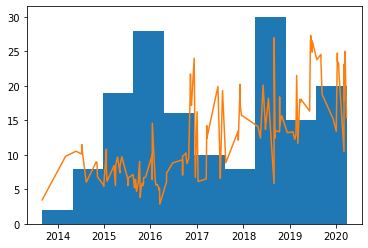

In [257]:
plt.hist(ac_data['JobStartDate'])
plt.plot(ac_data['Water_per_Ft']/100);

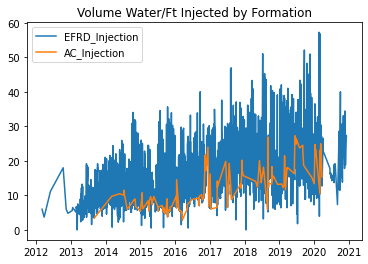

In [258]:
#I need to make this plot just for 2017-2018 and see what the difference is
plt.plot(new_frac_df['Water_per_Ft']/100, label = 'EFRD_Injection')
plt.plot(ac_data['Water_per_Ft']/100, label = 'AC_Injection')
plt.title('Volume Water/Ft Injected by Formation')
plt.legend();

At this point, I have a great dataset to do EDA on to understand how fracs have changed over time. I will save that new_frac_df out as a separate csv so I have it for reference in the EDA notebook. BUT, I need to further parse the data down to get it ready for modelling. That work will be done in this next section. The over-arching goal for this section is to have a daily understanding of # of fracs going on at one time, the total volume being injected per day, etc. That is the kind if information I will add to this next dataframe. 

In [259]:
#I want to get to a # of fracs going on per day over time
#first I'm going to make a copy of that new_frac_df so I don't ruin it
frac_copy = new_frac_df.copy()
frac_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5634 entries, 2012-03-02 to 2020-12-05
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   JobStartDate          5634 non-null   object 
 1   JobEndDate            5634 non-null   object 
 2   APINumber             5634 non-null   int64  
 3   OperatorName          5634 non-null   object 
 4   WellName              5634 non-null   object 
 5   TotalBaseWaterVolume  5634 non-null   float64
 6   Purpose               5321 non-null   object 
 7   IngredientName        5634 non-null   object 
 8   PercentHFJob          5634 non-null   float64
 9   Job_Duration          5634 non-null   int64  
 10  Sand_Purpose          4118 non-null   object 
 11  Sand_IngredientName   5634 non-null   object 
 12  Sum_Sand_PctHFJob     5634 non-null   float64
 13  VolumeH2O_per_Day     5634 non-null   float64
 14  Water_per_Ft          5634 non-null   float64
dtypes: 

In [260]:
frac_copy.head()

,JobStartDate,JobEndDate,APINumber,OperatorName,WellName,TotalBaseWaterVolume,Purpose,IngredientName,PercentHFJob,Job_Duration,Sand_Purpose,Sand_IngredientName,Sum_Sand_PctHFJob,VolumeH2O_per_Day,Water_per_Ft
StartDate,,,,,,,,,,,,,,,
2012-03-02,2012-03-02,2012-03-06,42255328870000,BHP Billiton Petroleum,Gallo Rojo A 5H,3179106.0,Carrier/Base Fluid,Water,81.272541,4,Proppant,Silica Substrate,33.956147,794776.5,602.103409
2012-03-02,2012-03-02,2012-03-06,42255328870000,BHP Billiton Petroleum,Gallo Rojo A 5H,3179106.0,Carrier/Base Fluid,Water,81.272541,4,Proppant,Silica Substrate,33.956147,794776.5,602.103409
2012-03-02,2012-03-02,2012-03-06,42255328870000,BHP Billiton Petroleum,Gallo Rojo A 5H,3179106.0,Carrier/Base Fluid,Water,81.272541,4,Proppant,Silica Substrate,33.956147,794776.5,602.103409
2012-03-02,2012-03-02,2012-03-06,42255328870000,BHP Billiton Petroleum,Gallo Rojo A 5H,3179106.0,Carrier/Base Fluid,Water,81.272541,4,Proppant,Silica Substrate,33.956147,794776.5,602.103409
2012-03-02,2012-03-02,2012-03-06,42255328870000,BHP Billiton Petroleum,Gallo Rojo A 5H,3179106.0,Carrier/Base Fluid,Water,81.272541,4,Proppant,Silica Substrate,33.956147,794776.5,602.103409


In [261]:
#going to make an empty dataframe to concatenate onto
data = [0]
index = pd.date_range(start='3/2/2012', end = '12/5/2020', freq = 'D')
data_full = data*len(index)
frac_daily_df = pd.DataFrame(data=data_full, index=index)
frac_daily_df

,0
2012-03-02,0
2012-03-03,0
2012-03-04,0
2012-03-05,0
2012-03-06,0
...,...
2020-12-01,0
2020-12-02,0
2020-12-03,0
2020-12-04,0


In [262]:
#this line of code will give me the number of fracs going on every day using the frac_copy dataframe as a reference
frac_daily_df['fracs_per_day'] = frac_daily_df.index.to_series().apply(lambda x: frac_copy[(frac_copy['JobStartDate'] <= x) & (frac_copy['JobEndDate'] >= x)].shape[0])

In [263]:
frac_daily_df.drop(0, axis=1, inplace=True)
frac_daily_df

,fracs_per_day
2012-03-02,8
2012-03-03,8
2012-03-04,8
2012-03-05,8
2012-03-06,8
...,...
2020-12-01,4
2020-12-02,3
2020-12-03,0
2020-12-04,2


In [264]:
#these two lines will give me a calculation of volume of water injected every day for the corresponding completion activity and the average volume of water injected per ft, assuming all wells are 1 mile long (sort of standard- it's definitely an assumption)
frac_daily_df['volume_per_day'] = frac_daily_df.index.to_series().apply(lambda x: frac_copy[(frac_copy['JobStartDate'] <= x) & (frac_copy['JobEndDate'] >= x)]['VolumeH2O_per_Day'].sum())
frac_daily_df['avg_volh2o_per_ft'] = frac_daily_df.index.to_series().apply(lambda x: frac_copy[(frac_copy['JobStartDate'] <= x) & (frac_copy['JobEndDate'] >= x)]['Water_per_Ft'].mean())

In [265]:
frac_daily_df['APIs'] = frac_daily_df.index.to_series().apply(lambda x: frac_copy[(frac_copy['JobStartDate'] <= x) & (frac_copy['JobEndDate'] >= x)]['APINumber'].to_list())

In [266]:
frac_daily_df

,fracs_per_day,volume_per_day,avg_volh2o_per_ft,APIs
2012-03-02,8,6.358212e+06,602.103409,"[42255328870000, 42255328870000, 4225532887000..."
2012-03-03,8,6.358212e+06,602.103409,"[42255328870000, 42255328870000, 4225532887000..."
2012-03-04,8,6.358212e+06,602.103409,"[42255328870000, 42255328870000, 4225532887000..."
2012-03-05,8,6.358212e+06,602.103409,"[42255328870000, 42255328870000, 4225532887000..."
2012-03-06,8,6.358212e+06,602.103409,"[42255328870000, 42255328870000, 4225532887000..."
...,...,...,...,...
2020-12-01,4,5.856378e+06,2638.939820,"[42255369570000, 42255369590000, 4225536775000..."
2020-12-02,3,4.201797e+06,2891.851136,"[42255369570000, 42255369590000, 42255367750000]"
2020-12-03,0,0.000000e+00,NaN,[]
2020-12-04,2,2.612473e+06,2721.325568,"[42255369580000, 42255369550000]"


In [267]:
#now I'm ready to export both frac_copy and frac_daily_df
#frac_copy.to_csv('oil_and_gas_data/reference_data/reference_completion_information.csv')
#frac_daily_df.to_csv('oil_and_gas_data/reference_data/completion_information_by_day.csv')

Now to get everything into one master dataframe.

In [193]:
#Here are the date ranges I currently have for each dataset:
#seismicity catalog: 2010-03-01 to 2021-02-01
#rig count: 2016-01-01 to 2021-01-31
#commodity prices: 2011-01-01 to 2021-02-08
#frac data: 2015-03-23 to 2020-12-05

#based on this information, I'm going to make a master dataframe with the date range 2016-01-01 to 2021-01-31

In [194]:
total_catalog.loc['2017-1-1':'2017-1-10']

,EventID,Evaluation Status,Origin Time,Magnitude,Latitude (WGS84),Longitude (WGS84),LocationName,Daily_Sum,Daily_Avg,Daily_Count
2017-01-01,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0
2017-01-02,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0
2017-01-03,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0
2017-01-04,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0
2017-01-05,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0
2017-01-06,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0
2017-01-07,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0
2017-01-08,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0
2017-01-09,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0
2017-01-10,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0


In [195]:
seismicity = total_catalog[['Daily_Avg', 'Daily_Sum', 'Daily_Count']]
seismicity.loc['2017-1-1':'2017-1-10']

,Daily_Avg,Daily_Sum,Daily_Count
2017-01-01,0.0,0.0,0
2017-01-02,0.0,0.0,0
2017-01-03,0.0,0.0,0
2017-01-04,0.0,0.0,0
2017-01-05,0.0,0.0,0
2017-01-06,0.0,0.0,0
2017-01-07,0.0,0.0,0
2017-01-08,0.0,0.0,0
2017-01-09,0.0,0.0,0
2017-01-10,0.0,0.0,0


In [196]:
#I think I have some duplicates in here actually, I should get rid of those since I'm only interested in the summary/high-level information
seismicity.index.value_counts().head(15)

2018-12-22    24
2018-12-21    12
2019-03-11     7
2018-07-01     6
2018-02-12     6
2020-09-05     5
2019-05-10     5
2018-11-03     5
2019-02-17     5
2019-02-18     4
2017-11-14     4
2019-03-18     4
2019-03-23     4
2019-03-17     4
2020-08-22     4
dtype: int64

In [197]:
#yes, I definitely do have some duplicates
seismicity_test = seismicity[seismicity.index.value_counts() == 24]
seismicity_test.head(5)

<ipython-input-197-073e957a6af5>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  seismicity_test = seismicity[seismicity.index.value_counts() == 24]


,Daily_Avg,Daily_Sum,Daily_Count
2018-12-22,1.708333,41.0,24
2018-12-22,1.708333,41.0,24
2018-12-22,1.708333,41.0,24
2018-12-22,1.708333,41.0,24
2018-12-22,1.708333,41.0,24


In [198]:
#I can do a simple drop duplicates here, since the information is all the same.
#BUT, I will drop valuable informatino because drop_duplicates doesn't take the index into account
#so, first make a duplicate column of the index, call it dates
seismicity['dates'] = seismicity.index
#then drop the duplicates
seismicity = seismicity.drop_duplicates()
seismicity.index.value_counts()

<ipython-input-198-0b174a84dabd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seismicity['dates'] = seismicity.index


2020-08-26    1
2017-05-04    1
2016-03-19    1
2013-12-06    1
2011-08-25    1
             ..
2019-01-22    1
2012-12-28    1
2014-02-20    1
2019-02-21    1
2020-10-02    1
Length: 3991, dtype: int64

In [199]:
#to create my master_df, I need to decide on the time range I want. I'm going to make this
#dataset a little bit wider of a time range than what I want to model, but not by alot.
#seismicity.loc['1-1-2016':'1-10-2016']
master_df = seismicity.loc['1-1-2016':,]
master_df.drop('dates', axis=1, inplace=True)
master_df

/Users/melissamcmillan/opt/anaconda3/envs/timer/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Daily_Avg,Daily_Sum,Daily_Count
2016-01-01,0.0,0.0,0
2016-01-02,0.0,0.0,0
2016-01-03,0.0,0.0,0
2016-01-04,0.0,0.0,0
2016-01-05,0.0,0.0,0
...,...,...,...
2021-01-28,0.0,0.0,0
2021-01-29,0.0,0.0,0
2021-01-30,0.0,0.0,0
2021-01-31,0.0,0.0,0


In [200]:
#now I would actually like to add in a diff column for Daily count
daily_count = master_df[['Daily_Count']]
daily_count['Dly_Cnt_Diff'] = daily_count['Daily_Count'].diff()
daily_count.loc['1-1-2018':'1-10-2018',]

<ipython-input-200-f1076f2ca71c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_count['Dly_Cnt_Diff'] = daily_count['Daily_Count'].diff()


,Daily_Count,Dly_Cnt_Diff
2018-01-01,0,0.0
2018-01-02,0,0.0
2018-01-03,1,1.0
2018-01-04,0,-1.0
2018-01-05,0,0.0
2018-01-06,0,0.0
2018-01-07,0,0.0
2018-01-08,0,0.0
2018-01-09,1,1.0
2018-01-10,1,0.0


In [201]:
master_df['Dly_Cnt_Diff'] = daily_count['Dly_Cnt_Diff']
master_df.head()

<ipython-input-201-e48821b53253>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df['Dly_Cnt_Diff'] = daily_count['Dly_Cnt_Diff']


,Daily_Avg,Daily_Sum,Daily_Count,Dly_Cnt_Diff
2016-01-01,0.0,0.0,0,NaN
2016-01-02,0.0,0.0,0,0.0
2016-01-03,0.0,0.0,0,0.0
2016-01-04,0.0,0.0,0,0.0
2016-01-05,0.0,0.0,0,0.0


In [202]:
#next up is adding the rig count data, this should be pretty straightforward
master_df = pd.merge(left=master_df, right=fill_rig_count, how='left', left_index=True, right_index=True)
master_df.rename({'Rig Count': 'Rig_Count'}, axis=1, inplace=True)
master_df

,Daily_Avg,Daily_Sum,Daily_Count,Dly_Cnt_Diff,Rig_Count
2016-01-01,0.0,0.0,0,NaN,33.0
2016-01-02,0.0,0.0,0,0.0,33.0
2016-01-03,0.0,0.0,0,0.0,33.0
2016-01-04,0.0,0.0,0,0.0,33.0
2016-01-05,0.0,0.0,0,0.0,33.0
...,...,...,...,...,...
2021-01-28,0.0,0.0,0,0.0,12.0
2021-01-29,0.0,0.0,0,0.0,12.0
2021-01-30,0.0,0.0,0,0.0,12.0
2021-01-31,0.0,0.0,0,0.0,12.0


In [203]:
#now it's time to add in the commodity price data
master_df = pd.merge(left=master_df, right=fill_comm_price, how='left', left_index=True, right_index=True)
master_df.rename({'WTI Spot Price': 'WTI_Spot_Price', 'Brent Spot Price': 'Brent_Spot_Price'}, axis=1, inplace=True)
master_df

,Daily_Avg,Daily_Sum,Daily_Count,Dly_Cnt_Diff,Rig_Count,WTI_Spot_Price,Brent_Spot_Price
2016-01-01,0.0,0.0,0,NaN,33.0,37.13,36.61
2016-01-02,0.0,0.0,0,0.0,33.0,37.13,36.61
2016-01-03,0.0,0.0,0,0.0,33.0,37.13,36.61
2016-01-04,0.0,0.0,0,0.0,33.0,36.81,36.28
2016-01-05,0.0,0.0,0,0.0,33.0,35.97,35.56
...,...,...,...,...,...,...,...
2021-01-28,0.0,0.0,0,0.0,12.0,52.26,54.87
2021-01-29,0.0,0.0,0,0.0,12.0,52.16,55.25
2021-01-30,0.0,0.0,0,0.0,12.0,52.16,55.25
2021-01-31,0.0,0.0,0,0.0,12.0,52.16,55.25


In [204]:
#and finally time to add the frac data
master_df = pd.merge(left=master_df, right=frac_daily_df, how='left', left_index=True, right_index=True)
master_df

,Daily_Avg,Daily_Sum,Daily_Count,Dly_Cnt_Diff,Rig_Count,WTI_Spot_Price,Brent_Spot_Price,fracs_per_day,volume_per_day,avg_volh2o_per_ft,APIs
2016-01-01,0.0,0.0,0,NaN,33.0,37.13,36.61,9.0,5.080098e+06,1088.829502,"[42255346090000, 42255346080000, 4225534610000..."
2016-01-02,0.0,0.0,0,0.0,33.0,37.13,36.61,11.0,5.892634e+06,1044.749861,"[42255346090000, 42255346080000, 4225534610000..."
2016-01-03,0.0,0.0,0,0.0,33.0,37.13,36.61,9.0,4.539134e+06,1125.551135,"[42255346090000, 42255346080000, 4225534610000..."
2016-01-04,0.0,0.0,0,0.0,33.0,36.81,36.28,26.0,1.135010e+07,848.112281,"[42255346090000, 42255346080000, 4225534610000..."
2016-01-05,0.0,0.0,0,0.0,33.0,35.97,35.56,26.0,1.135010e+07,848.112281,"[42255346090000, 42255346080000, 4225534610000..."
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-28,0.0,0.0,0,0.0,12.0,52.26,54.87,NaN,NaN,NaN,NaN
2021-01-29,0.0,0.0,0,0.0,12.0,52.16,55.25,NaN,NaN,NaN,NaN
2021-01-30,0.0,0.0,0,0.0,12.0,52.16,55.25,NaN,NaN,NaN,NaN
2021-01-31,0.0,0.0,0,0.0,12.0,52.16,55.25,NaN,NaN,NaN,NaN


In [205]:
#and export as a csv!
#master_df.to_csv('oil_and_gas_data/data_for_modelling/data_ready_for_modelling.csv')

In [206]:
#I'm also going to make a dataframe that is the same as master_df, but resampled to Weekly
weekly_master_df = master_df.resample('W').mean()

In [207]:
weekly_master_df

,Daily_Avg,Daily_Sum,Daily_Count,Dly_Cnt_Diff,Rig_Count,WTI_Spot_Price,Brent_Spot_Price,fracs_per_day,volume_per_day,avg_volh2o_per_ft
2016-01-03,0.000000,0.000000,0.000000,0.000000,33.000000,37.130000,36.610000,9.666667,5.170622e+06,1086.376832
2016-01-10,0.000000,0.000000,0.000000,0.000000,33.000000,34.234286,33.472857,26.571429,1.235401e+07,825.894278
2016-01-17,0.000000,0.000000,0.000000,0.000000,33.000000,30.261429,29.014286,24.285714,1.620145e+07,1014.034459
2016-01-24,0.000000,0.000000,0.000000,0.000000,33.000000,30.051429,28.528571,87.571429,7.169845e+07,1488.242188
2016-01-31,0.000000,0.000000,0.000000,0.000000,33.571429,32.337143,32.145714,35.714286,2.944738e+07,1148.266959
...,...,...,...,...,...,...,...,...,...,...
2021-01-10,0.000000,0.000000,0.000000,-0.142857,11.000000,50.678571,53.937143,NaN,NaN,NaN
2021-01-17,0.214286,0.214286,0.142857,0.000000,11.000000,52.608571,55.214286,NaN,NaN,NaN
2021-01-24,0.000000,0.000000,0.000000,0.000000,11.285714,52.588571,55.227143,NaN,NaN,NaN
2021-01-31,0.000000,0.000000,0.000000,0.000000,12.000000,52.420000,55.198571,NaN,NaN,NaN


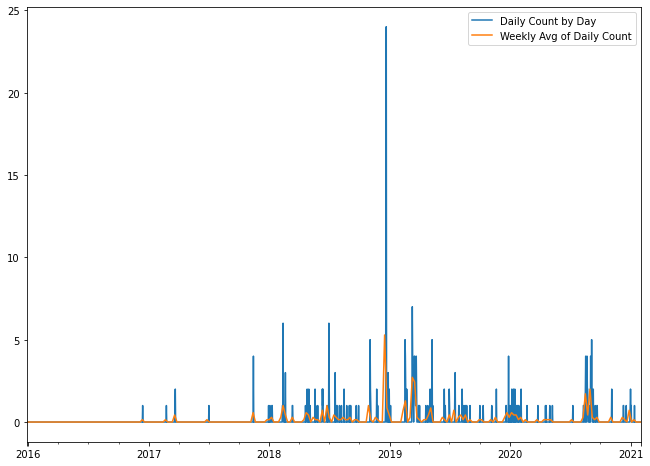

In [208]:
fig, ax = plt.subplots(figsize=(11,8))
master_df['Daily_Count'].plot(label='Daily Count by Day')
weekly_master_df['Daily_Count'].plot(label='Weekly Avg of Daily Count')
plt.legend();

Now I need to repeat all of those steps for the Fasola_TexNet catalog...

In [217]:
#this master dataframe will have the daterange of 1-1-2016 onward, I really don't need to go back to 2014
fasola_texnet_master = final_fasola_texnet_catalog.loc['1-1-2016':,]
fasola_texnet_master = fasola_texnet_master[['Daily_Avg', 'Daily_Sum', 'Daily_Count']]
fasola_texnet_master.head()

,Daily_Avg,Daily_Sum,Daily_Count
2016-01-01,0.0,0.0,0
2016-01-02,0.0,0.0,0
2016-01-03,0.0,0.0,0
2016-01-04,0.0,0.0,0
2016-01-05,0.0,0.0,0


In [218]:
#I think I have some duplicates in here actually, I should get rid of those since I'm only interested in the summary/high-level information
fasola_texnet_master.index.value_counts().head(15)

2018-12-22    104
2018-12-21     64
2018-07-02     55
2018-05-01     49
2018-02-12     49
2018-07-01     48
2016-12-13     48
2017-01-03     43
2017-07-03     36
2018-06-10     34
2017-09-10     33
2017-11-14     29
2018-01-11     29
2017-02-18     29
2018-01-09     29
dtype: int64

In [219]:
#going to drop duplicates, but save the Date information first
fasola_texnet_master['dates'] = fasola_texnet_master.index
#then drop the duplicates
fasola_texnet_master = fasola_texnet_master.drop_duplicates()
fasola_texnet_master.index.value_counts()

2018-01-05    1
2019-06-23    1
2016-04-07    1
2018-04-05    1
2017-05-14    1
             ..
2018-12-15    1
2018-06-25    1
2018-03-12    1
2018-04-16    1
2018-11-10    1
Length: 1859, dtype: int64

In [220]:
#now to add in the rig count data
fasola_texnet_master = pd.merge(left=fasola_texnet_master, right=fill_rig_count, how='left',
                             left_index=True, right_index=True)
fasola_texnet_master.rename({'Rig Count': 'Rig_Count'}, axis=1, inplace=True)
fasola_texnet_master.drop('dates', axis=1, inplace=True)
fasola_texnet_master

,Daily_Avg,Daily_Sum,Daily_Count,Rig_Count
2016-01-01,0.0,0.0,0,33.0
2016-01-02,0.0,0.0,0,33.0
2016-01-03,0.0,0.0,0,33.0
2016-01-04,0.0,0.0,0,33.0
2016-01-05,0.0,0.0,0,33.0
...,...,...,...,...
2021-01-28,0.0,0.0,0,12.0
2021-01-29,0.0,0.0,0,12.0
2021-01-30,0.0,0.0,0,12.0
2021-01-31,0.0,0.0,0,12.0


In [221]:
#now it's time to add in the commodity price data
fasola_texnet_master = pd.merge(left=fasola_texnet_master, right=fill_comm_price, how='left', left_index=True, right_index=True)
fasola_texnet_master.rename({'WTI Spot Price': 'WTI_Spot_Price', 'Brent Spot Price': 'Brent_Spot_Price'}, axis=1, inplace=True)
fasola_texnet_master

,Daily_Avg,Daily_Sum,Daily_Count,Rig_Count,WTI_Spot_Price,Brent_Spot_Price
2016-01-01,0.0,0.0,0,33.0,37.13,36.61
2016-01-02,0.0,0.0,0,33.0,37.13,36.61
2016-01-03,0.0,0.0,0,33.0,37.13,36.61
2016-01-04,0.0,0.0,0,33.0,36.81,36.28
2016-01-05,0.0,0.0,0,33.0,35.97,35.56
...,...,...,...,...,...,...
2021-01-28,0.0,0.0,0,12.0,52.26,54.87
2021-01-29,0.0,0.0,0,12.0,52.16,55.25
2021-01-30,0.0,0.0,0,12.0,52.16,55.25
2021-01-31,0.0,0.0,0,12.0,52.16,55.25


In [222]:
#and finally time to add the frac data
fasola_texnet_master = pd.merge(left=fasola_texnet_master, right=frac_daily_df, how='left', left_index=True, right_index=True)
fasola_texnet_master

,Daily_Avg,Daily_Sum,Daily_Count,Rig_Count,WTI_Spot_Price,Brent_Spot_Price,fracs_per_day,volume_per_day,avg_volh2o_per_ft,APIs
2016-01-01,0.0,0.0,0,33.0,37.13,36.61,9.0,5.080098e+06,1088.829502,"[42255346090000, 42255346080000, 4225534610000..."
2016-01-02,0.0,0.0,0,33.0,37.13,36.61,11.0,5.892634e+06,1044.749861,"[42255346090000, 42255346080000, 4225534610000..."
2016-01-03,0.0,0.0,0,33.0,37.13,36.61,9.0,4.539134e+06,1125.551135,"[42255346090000, 42255346080000, 4225534610000..."
2016-01-04,0.0,0.0,0,33.0,36.81,36.28,26.0,1.135010e+07,848.112281,"[42255346090000, 42255346080000, 4225534610000..."
2016-01-05,0.0,0.0,0,33.0,35.97,35.56,26.0,1.135010e+07,848.112281,"[42255346090000, 42255346080000, 4225534610000..."
...,...,...,...,...,...,...,...,...,...,...
2021-01-28,0.0,0.0,0,12.0,52.26,54.87,NaN,NaN,NaN,NaN
2021-01-29,0.0,0.0,0,12.0,52.16,55.25,NaN,NaN,NaN,NaN
2021-01-30,0.0,0.0,0,12.0,52.16,55.25,NaN,NaN,NaN,NaN
2021-01-31,0.0,0.0,0,12.0,52.16,55.25,NaN,NaN,NaN,NaN


In [223]:
#and export as a csv!
#fasola_texnet_master.to_csv('oil_and_gas_data/data_for_modelling/fasola_data_ready_for_modelling.csv')

Now I'd like to make a mega_df with all three catalogs combined and as much frac info as I have.

In [ ]:
#here are the time ranges again for each dataset (I went back and grabbed more data)
#rig count: 12-4-2009 to recent
#commodity pricing: 01-01-2011 to recent
#frac data: 3-2-2012 to december 2020

In [317]:
all_three_catalogs.head(5)

,Origin Time,Latitude (WGS84),Longitude (WGS84),Magnitude,EventID,Evaluation Status
2010-03-01,NaN,NaN,NaN,0.0,NaN,NaN
2010-03-02,NaN,NaN,NaN,0.0,NaN,NaN
2010-03-03,NaN,NaN,NaN,0.0,NaN,NaN
2010-03-04,NaN,NaN,NaN,0.0,NaN,NaN
2010-03-05,NaN,NaN,NaN,0.0,NaN,NaN


In [318]:
#I need to make the extra columns for this dataset
#this is for daily avg magnitude
all_three_daily_avg = all_three_catalogs.resample('D').mean()
#this is for weekly avg magnitude
all_three_daily_sum = all_three_catalogs.resample('D').sum()
#this is to get the daily count of events
all_three_daily_count = all_three_catalogs.resample('D').count()

In [319]:
#these lines will add those calculations to the dataframe
all_three_catalogs['Daily_Sum'] = all_three_daily_sum['Magnitude']
all_three_catalogs['Daily_Avg'] = all_three_daily_avg['Magnitude']
all_three_catalogs['Daily_Count'] = all_three_daily_count['Magnitude']

In [320]:
all_three_catalogs.head()

,Origin Time,Latitude (WGS84),Longitude (WGS84),Magnitude,EventID,Evaluation Status,Daily_Sum,Daily_Avg,Daily_Count
2010-03-01,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,1
2010-03-02,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,1
2010-03-03,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,1
2010-03-04,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,1
2010-03-05,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,1


In [321]:
#going to check now for the 12-22-2018 date
test_new = all_three_catalogs.loc['12-22-2018']
test_new

,Origin Time,Latitude (WGS84),Longitude (WGS84),Magnitude,EventID,Evaluation Status,Daily_Sum,Daily_Avg,Daily_Count
2018-12-22,2018-12-22T00:04:36,29.0140,-97.9298,0.584056,NaN,fasola,109.101739,1.049055,104
2018-12-22,2018-12-22T00:08:31,28.9865,-97.9277,0.963851,NaN,fasola,109.101739,1.049055,104
2018-12-22,2018-12-22T00:09:57,29.0067,-97.9174,0.888879,NaN,fasola,109.101739,1.049055,104
2018-12-22,2018-12-22T00:10:34,29.0103,-97.9029,1.204050,NaN,fasola,109.101739,1.049055,104
2018-12-22,2018-12-22T00:11:15,29.0085,-97.9029,1.041330,NaN,fasola,109.101739,1.049055,104
...,...,...,...,...,...,...,...,...,...
2018-12-22,2018-12-22T17:11:26,29.0158,-97.9091,0.900518,NaN,fasola,109.101739,1.049055,104
2018-12-22,2018-12-22T17:46:35,29.0195,-97.9091,0.610508,NaN,fasola,109.101739,1.049055,104
2018-12-22,2018-12-22T19:17:32,28.9828,-97.8926,0.430467,NaN,fasola,109.101739,1.049055,104
2018-12-22,2018-12-22T20:53:26,28.9865,-97.9277,0.631147,NaN,fasola,109.101739,1.049055,104


In [322]:
#yup, that is consistent
#then I need to fix the Daily Count column as it calculated the zeros as events
for idx, row in enumerate(all_three_catalogs['Magnitude']):
    if all_three_catalogs['Magnitude'][idx] == 0:
        all_three_catalogs['Daily_Count'][idx] = 0
all_three_catalogs.head(10)

<ipython-input-322-e971be443942>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_three_catalogs['Daily_Count'][idx] = 0


,Origin Time,Latitude (WGS84),Longitude (WGS84),Magnitude,EventID,Evaluation Status,Daily_Sum,Daily_Avg,Daily_Count
2010-03-01,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0
2010-03-02,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0
2010-03-03,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0
2010-03-04,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0
2010-03-05,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0
2010-03-06,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0
2010-03-07,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0
2010-03-08,2010-03-08T23:47:28.120Z,28.946,-98.039,3.0,usp000h8zg,reviewed,3.0,3.0,1
2010-03-09,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0
2010-03-10,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0


In [323]:
mega_df = all_three_catalogs[['Daily_Sum', 'Daily_Avg', 'Daily_Count']]
mega_df.head()

,Daily_Sum,Daily_Avg,Daily_Count
2010-03-01,0.0,0.0,0
2010-03-02,0.0,0.0,0
2010-03-03,0.0,0.0,0
2010-03-04,0.0,0.0,0
2010-03-05,0.0,0.0,0


In [324]:
#now to check for duplicates
mega_df.index.value_counts()

2018-12-22    104
2018-12-21     64
2018-07-02     55
2018-02-12     49
2018-05-01     49
             ... 
2017-10-01      1
2012-02-10      1
2012-12-01      1
2014-05-24      1
2019-08-12      1
Length: 3991, dtype: int64

In [325]:
#going to drop duplicates, but save the Date information first
mega_df['dates'] = mega_df.index
#then drop the duplicates
mega_df = mega_df.drop_duplicates()
mega_df.index.value_counts()

<ipython-input-325-593707aec187>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mega_df['dates'] = mega_df.index


2020-08-26    1
2017-05-04    1
2016-03-19    1
2013-12-06    1
2011-08-25    1
             ..
2019-01-22    1
2012-12-28    1
2014-02-20    1
2019-02-21    1
2020-10-02    1
Length: 3991, dtype: int64

In [326]:
#perfect
#now to add in the rig count data
mega_df = pd.merge(left=mega_df, right=fill_rig_count, how='left',
                             left_index=True, right_index=True)
mega_df.rename({'Rig Count': 'Rig_Count'}, axis=1, inplace=True)
mega_df.drop('dates', axis=1, inplace=True)
mega_df

,Daily_Sum,Daily_Avg,Daily_Count,Rig_Count
2010-03-01,0.0,0.0,0,22.0
2010-03-02,0.0,0.0,0,22.0
2010-03-03,0.0,0.0,0,22.0
2010-03-04,0.0,0.0,0,22.0
2010-03-05,0.0,0.0,0,22.0
...,...,...,...,...
2021-01-28,0.0,0.0,0,12.0
2021-01-29,0.0,0.0,0,12.0
2021-01-30,0.0,0.0,0,12.0
2021-01-31,0.0,0.0,0,12.0


In [327]:
#now it's time to add in the commodity price data
mega_df = pd.merge(left=mega_df, right=fill_comm_price, how='left', left_index=True, right_index=True)
mega_df.rename({'WTI Spot Price': 'WTI_Spot_Price', 'Brent Spot Price': 'Brent_Spot_Price'}, axis=1, inplace=True)
mega_df

,Daily_Sum,Daily_Avg,Daily_Count,Rig_Count,WTI_Spot_Price,Brent_Spot_Price
2010-03-01,0.0,0.0,0,22.0,NaN,NaN
2010-03-02,0.0,0.0,0,22.0,NaN,NaN
2010-03-03,0.0,0.0,0,22.0,NaN,NaN
2010-03-04,0.0,0.0,0,22.0,NaN,NaN
2010-03-05,0.0,0.0,0,22.0,NaN,NaN
...,...,...,...,...,...,...
2021-01-28,0.0,0.0,0,12.0,52.26,54.87
2021-01-29,0.0,0.0,0,12.0,52.16,55.25
2021-01-30,0.0,0.0,0,12.0,52.16,55.25
2021-01-31,0.0,0.0,0,12.0,52.16,55.25


In [328]:
#and finally time to add the frac data
mega_df = pd.merge(left=mega_df, right=frac_daily_df, how='left', left_index=True, right_index=True)
mega_df

,Daily_Sum,Daily_Avg,Daily_Count,Rig_Count,WTI_Spot_Price,Brent_Spot_Price,fracs_per_day,volume_per_day,avg_volh2o_per_ft,APIs
2010-03-01,0.0,0.0,0,22.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-02,0.0,0.0,0,22.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-03,0.0,0.0,0,22.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-04,0.0,0.0,0,22.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-05,0.0,0.0,0,22.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-01-28,0.0,0.0,0,12.0,52.26,54.87,NaN,NaN,NaN,NaN
2021-01-29,0.0,0.0,0,12.0,52.16,55.25,NaN,NaN,NaN,NaN
2021-01-30,0.0,0.0,0,12.0,52.16,55.25,NaN,NaN,NaN,NaN
2021-01-31,0.0,0.0,0,12.0,52.16,55.25,NaN,NaN,NaN,NaN


In [329]:
#and export as a csv!
#mega_df.to_csv('oil_and_gas_data/data_for_modelling/mega_data_ready_for_modelling.csv')